# Exploratory Data Analysis
### Topics of Interest:
- Trends
- Correlations
- Fourier Transformations
- Feature Importance
- Possible Clustering

### Questions of Interest:
- What frequencies have the greatest power for air pollution time series?
- What is the relation of air pollution concentrations to temperatures (raw, [min, max, mean] on different time scales)?
- What is the relation of air pollution concentrations to radiation (raw, [min, max, mean] on different time scales)?
- How are different air pollutants related through time? Is there a lag between their correlations (implying it is predictive)?
- What features are most important for the prediction of air pollutant concentrations?
- Can data inputs be clustered to improve future machine learning models?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import os

from datetime import datetime
from scipy.ndimage import *
from scipy.fftpack import *

# below is mainly for autotime assertion warnings
import warnings
warnings.filterwarnings("ignore")
sns.set_style('dark')

%load_ext autotime
%matplotlib inline

FILE = "cleaned_data.csv"
DIRI = "processed_data"

%pwd

'C:\\Users\\jimpg\\OneDrive\\Documents\\APWS\\jupyter'

In [2]:
file_path = os.path.join("..", DIRI, FILE)
df = pd.read_csv(file_path)
df

Unnamed: 0  Temperature (K)   Radiation    SO2    NO2     O3  \
0      2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1      2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2      2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3      2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4      2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                    ...              ...         ...    ...    ...    ...   
25900  2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901  2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902  2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903  2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904  2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  
0      1.2  73.0   57.0  
1      1.2  71.0   59.0  
2      1.2  70.0   59.0  
3      1.2  70.0   58.0  
4      1.2  69.0   61.0  
...    ...   ...    ...  
25900  0.5  26.0   19.0  
25901  0.4  27.0   19.0  
25902  0.4  23.0   18.0  
25903  0.5  20.0   19.0  
25904  0.5  20.0   15.0  

[25905 rows x 9 columns]

time: 62 ms


In [3]:
print(df.columns)
df.rename(columns = {'Unnamed: 0':'Time'}, inplace = True)
df

Index(['Unnamed: 0', 'Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO',
       'PM10', 'PM2.5'],
      dtype='object')


Time  Temperature (K)   Radiation    SO2    NO2     O3  \
0      2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1      2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2      2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3      2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4      2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                    ...              ...         ...    ...    ...    ...   
25900  2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901  2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902  2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903  2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904  2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  
0      1.2  73.0   57.0  
1      1.2  71.0   59.0  
2      1.2  70.0   59.0  
3      1.2  70.0   58.0  
4      1.2  69.0   61.0  
...    ...   ...    ...  
25900  0.5  26.0   19.0  
25901  0.4  27.0   19.0  
25902  0.4  23.0   18.0  
25903  0.5  20.0   19.0  
25904  0.5  20.0   15.0  

[25905 rows x 9 columns]

time: 15 ms


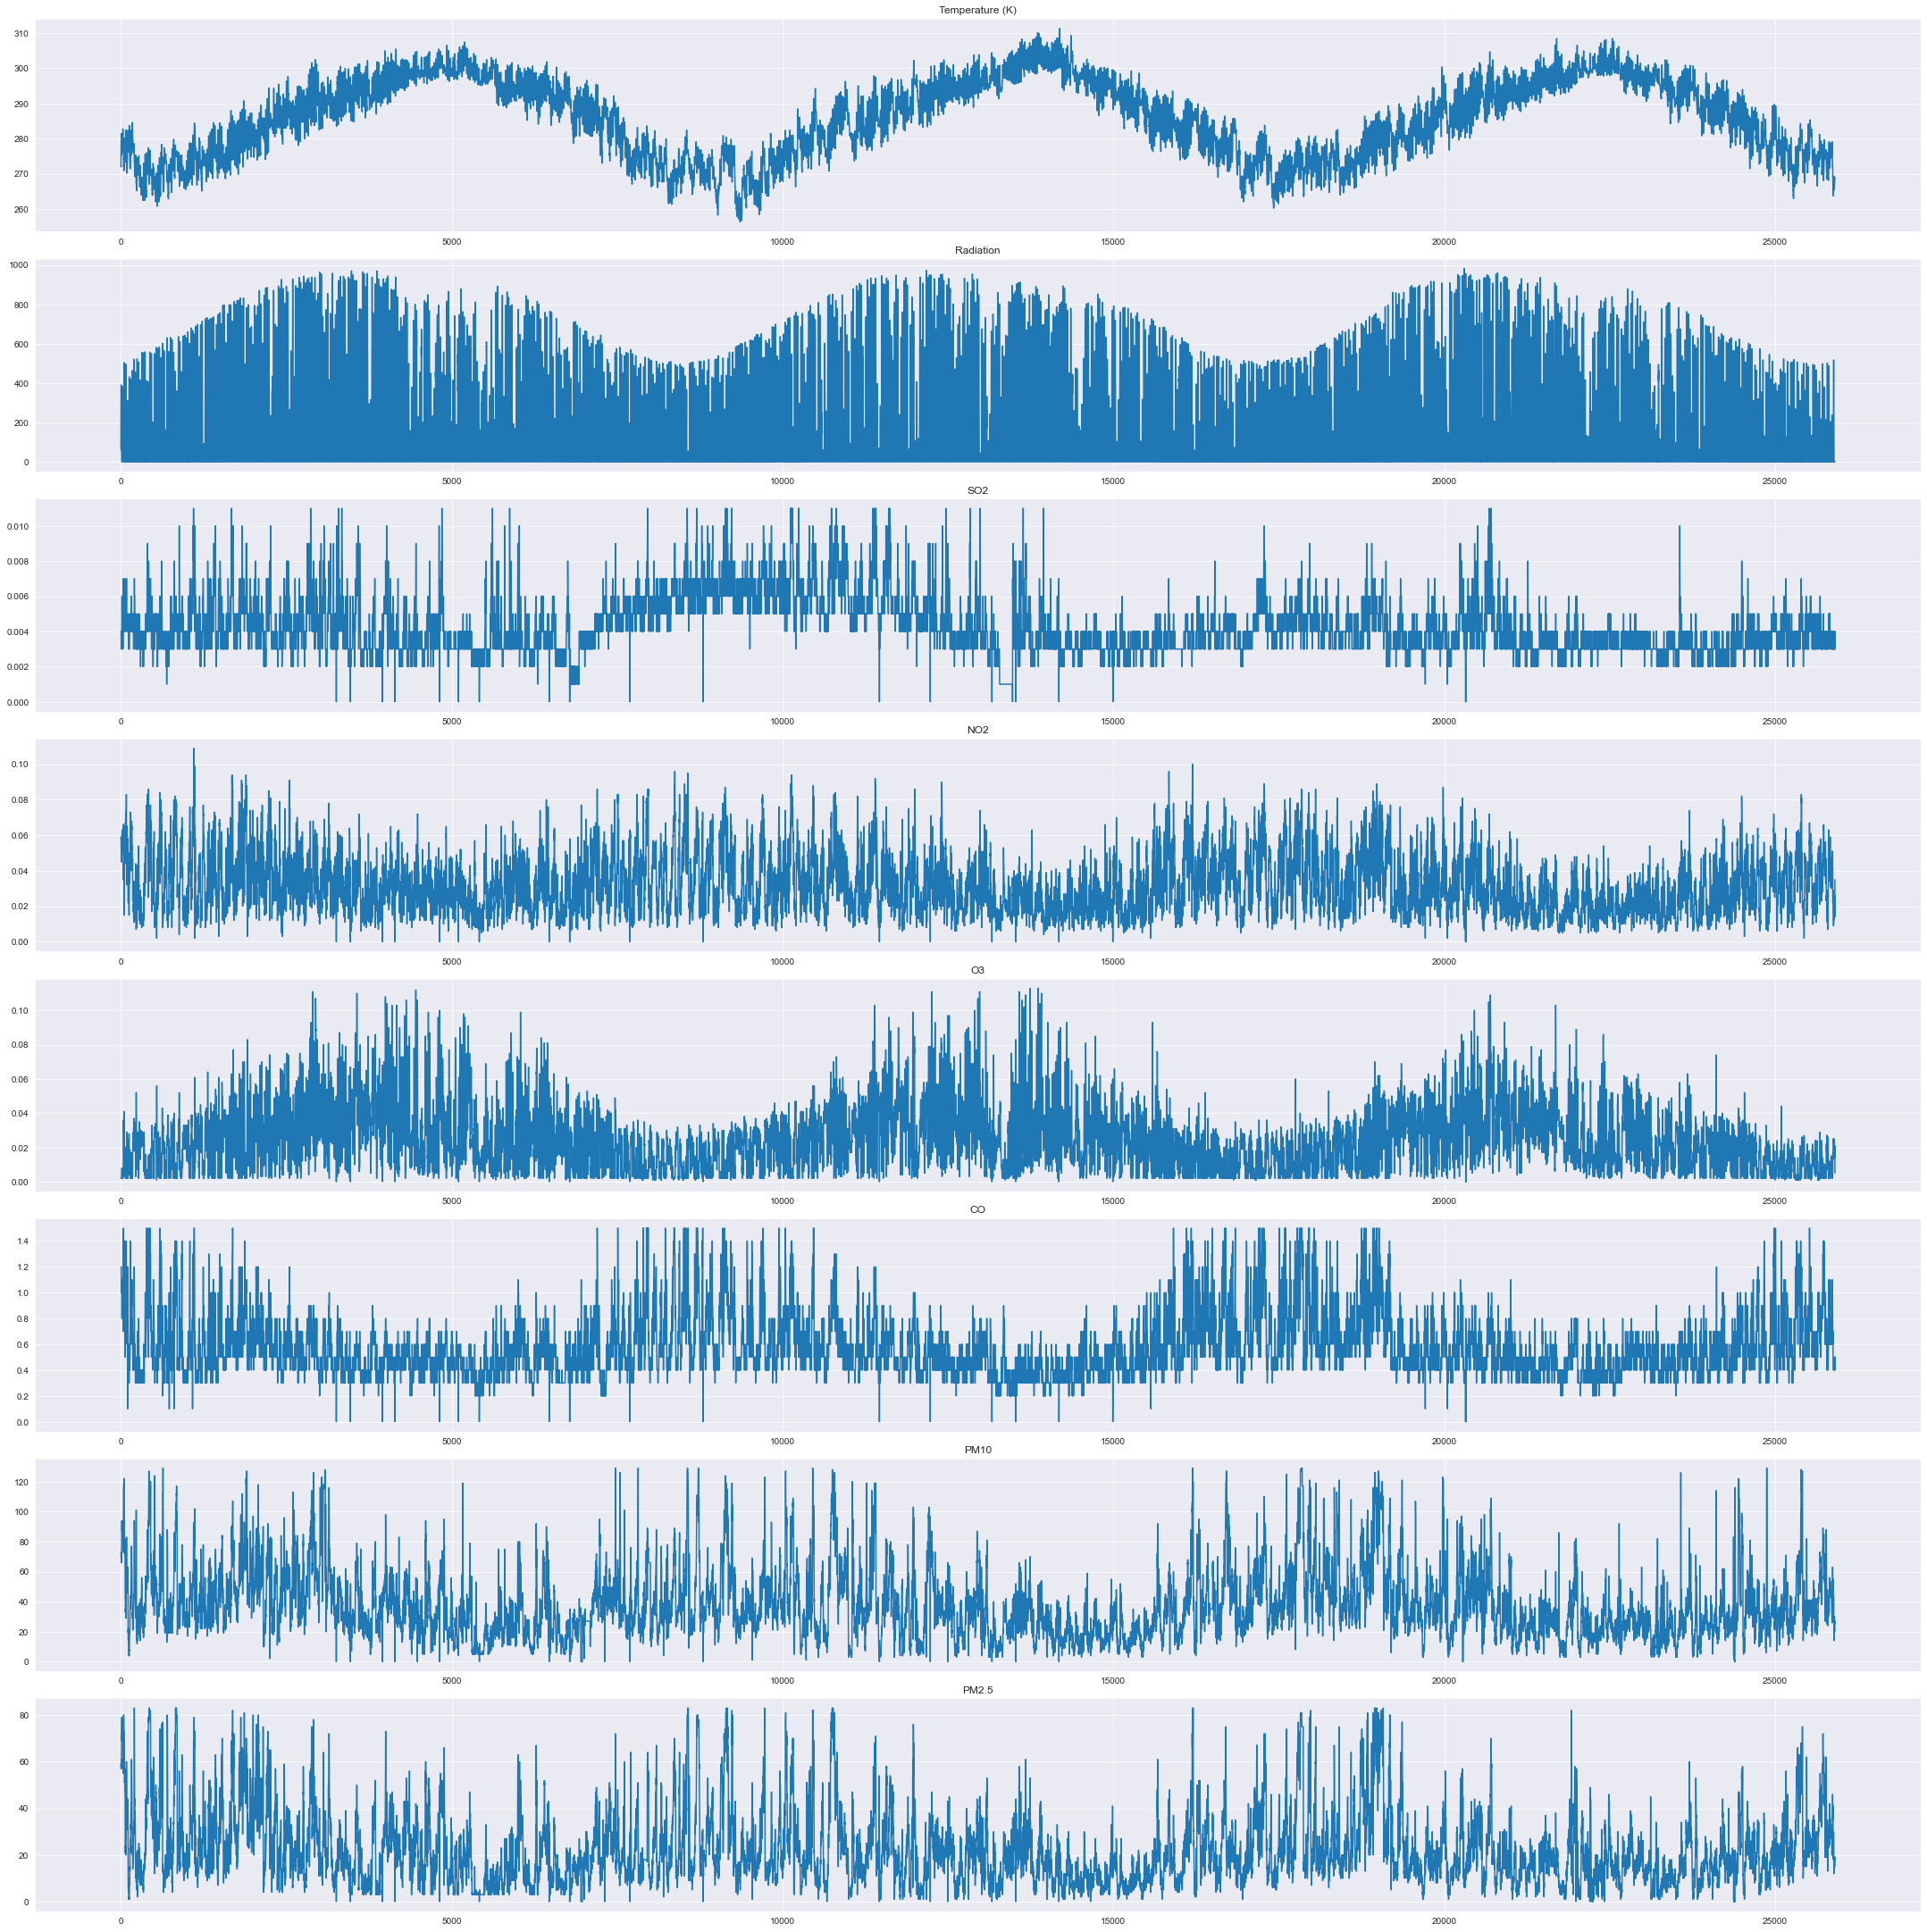

time: 1.44 s


In [4]:
components = ['Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

fig, axs = plt.subplots(8,1, figsize = (30, 30))
fig.tight_layout()

for idx, item in enumerate(components):
    axs[idx].plot(df[item]); plt.grid()
    axs[idx].set_title(item); axs[idx].grid()

### Trends


Temperature (K) parameters:
 const    284.142912
x1         0.000121
dtype: float64
Regression Start:  284.1429119404823 
Regression End:  287.27767578544143

Radiation parameters:
 const    191.605839
x1        -0.001073
dtype: float64
Regression Start:  191.60583865375122 
Regression End:  163.8166061264621

SO2 parameters:
 const    4.808495e-03
x1      -4.472461e-08
dtype: float64
Regression Start:  0.004808495322710897 
Regression End:  0.0036499489930582416

NO2 parameters:
 const    3.490243e-02
x1      -2.528553e-07
dtype: float64
Regression Start:  0.03490242778320493 
Regression End:  0.028352465094617883

O3 parameters:
 const    2.830619e-02
x1      -2.901536e-07
dtype: float64
Regression Start:  0.028306186971193362 
Regression End:  0.020790049276634914

CO parameters:
 const    5.652567e-01
x1       5.505604e-07
dtype: float64
Regression Start:  0.5652567114461713 
Regression End:  0.5795184284881978

PM10 parameters:
 const    42.224296
x1       -0.000390
dtype: float6

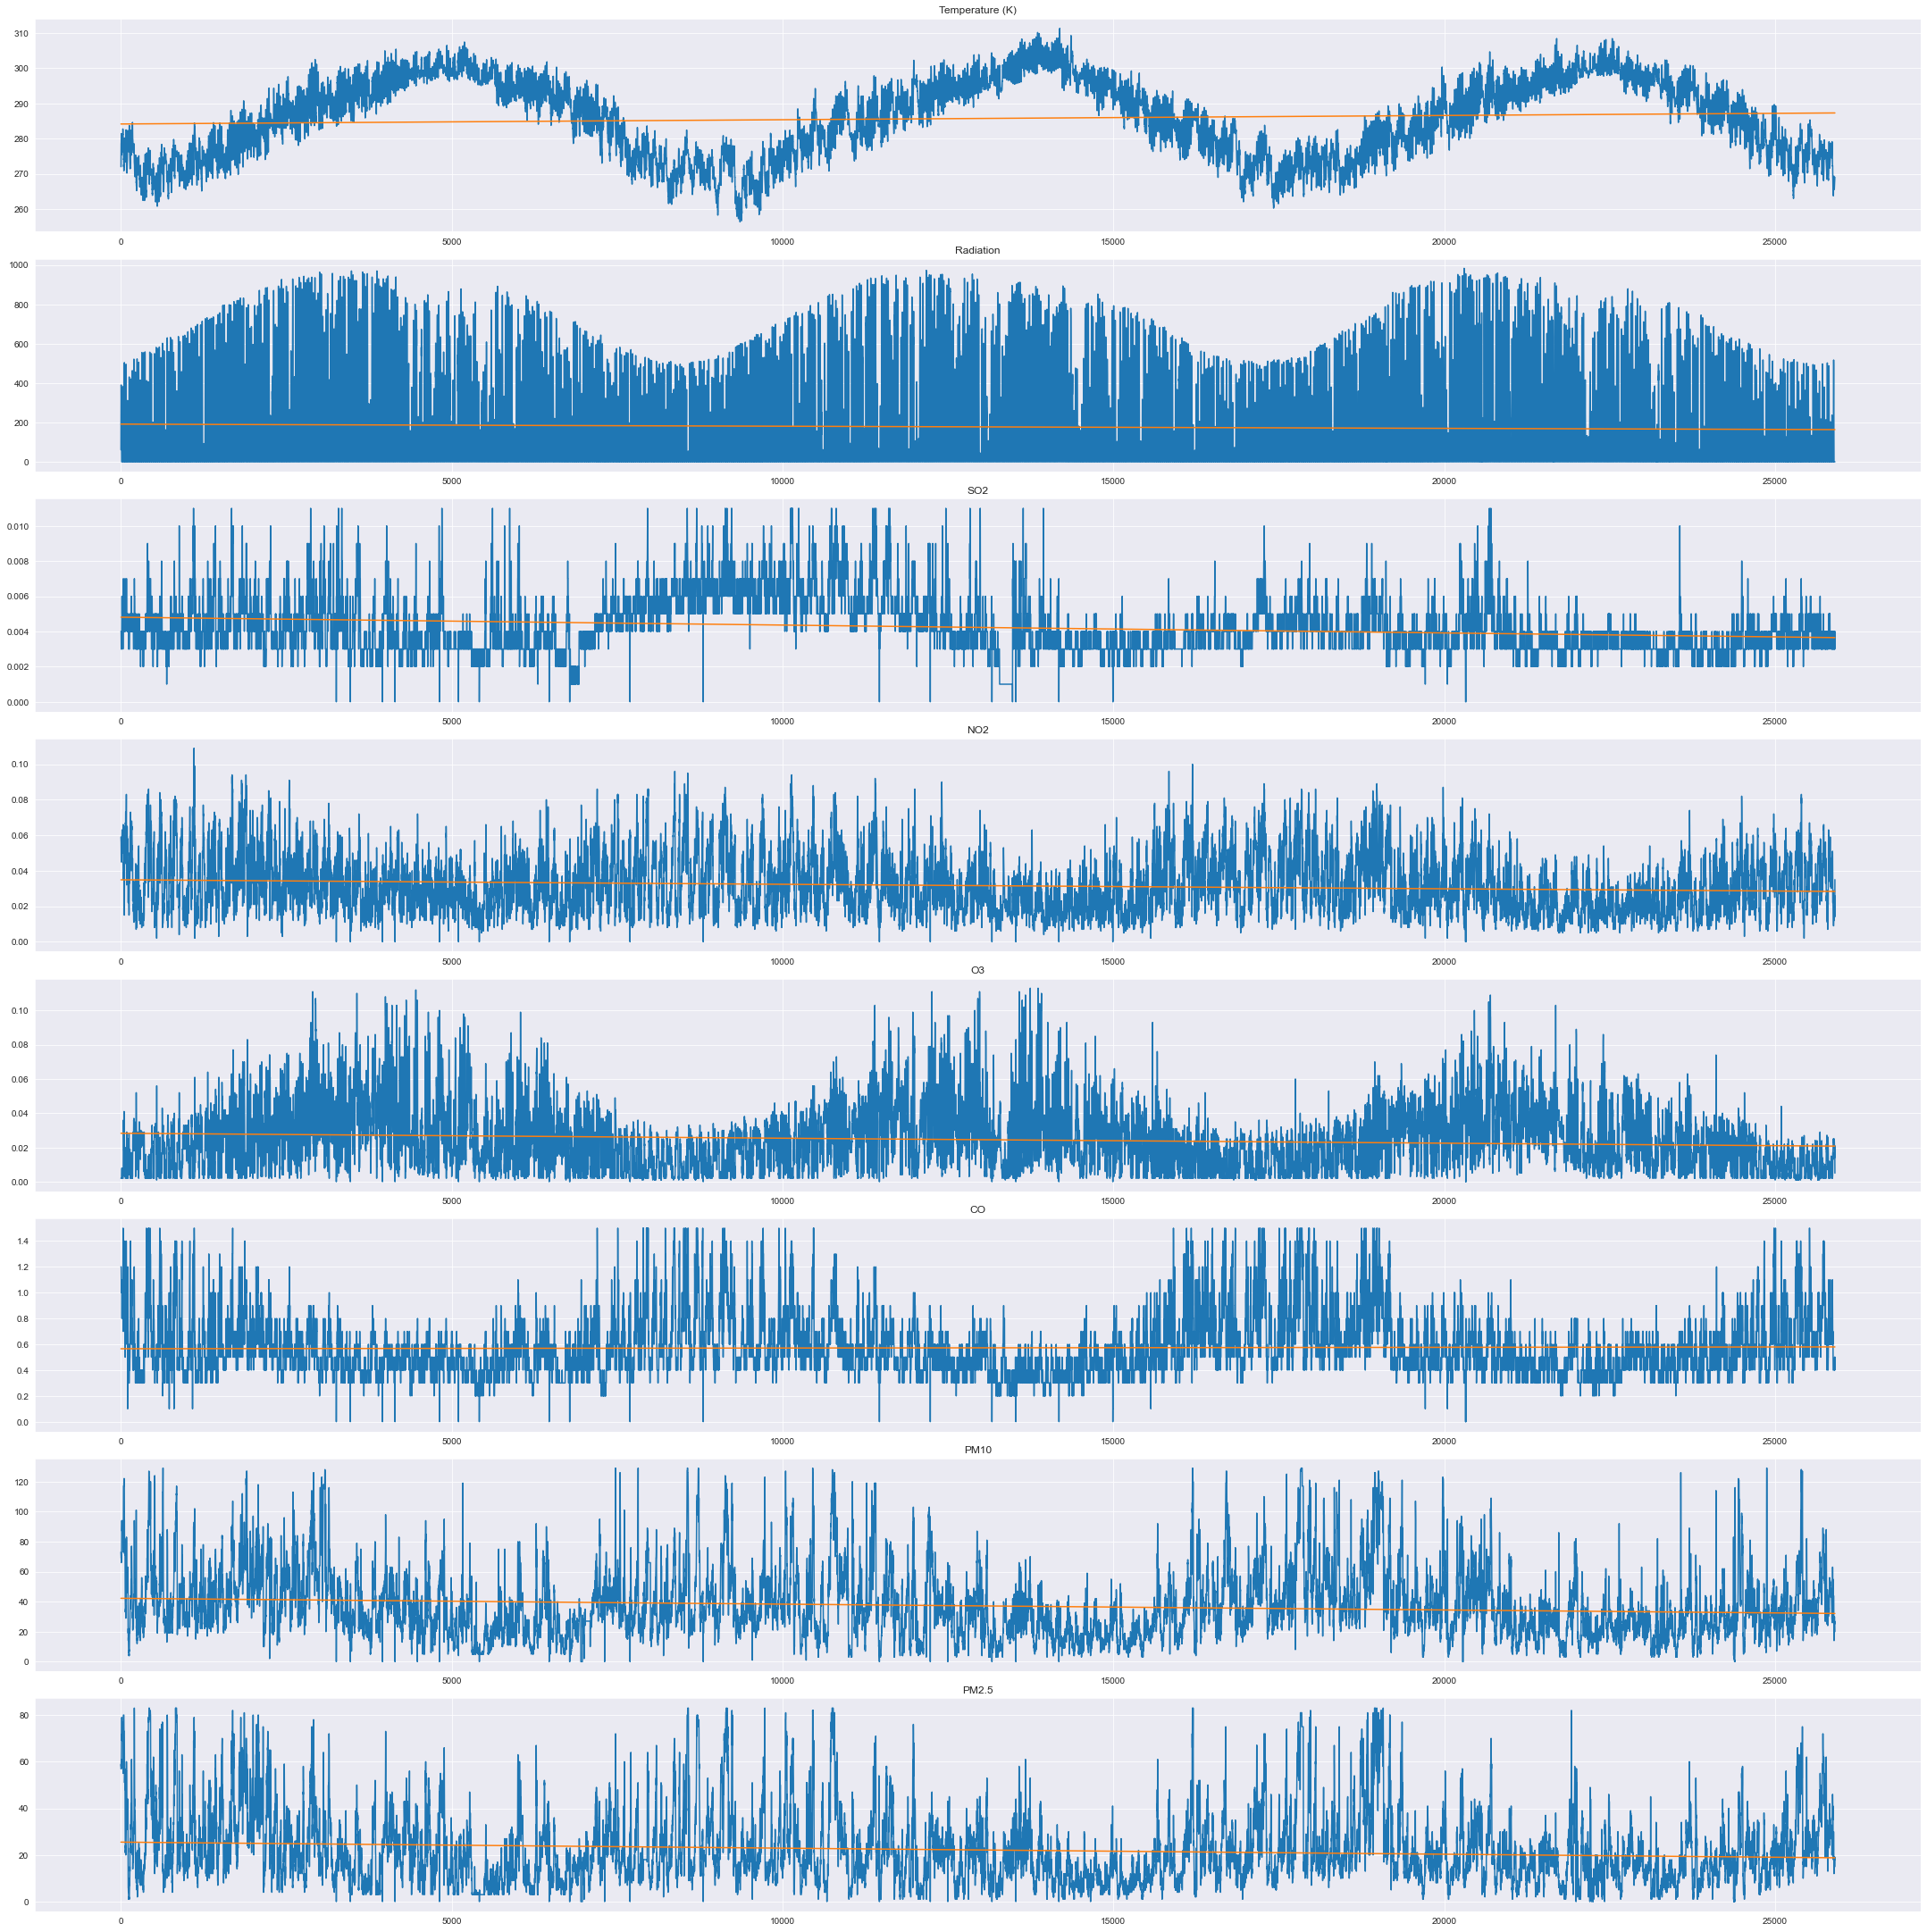

time: 1.73 s


In [5]:
fig, axs = plt.subplots(8,1, figsize = (30, 30))
fig.tight_layout()

for idx, item in enumerate(components):
    model = sm.OLS(df[item], sm.add_constant(df.index))
    beta = model.fit().params ; print(f"\n{item} parameters:\n", beta)
    print("Regression Start: ", beta["const"] + (beta["x1"] * df.index.min()), "\nRegression End: ",  beta["const"] + (beta["x1"] * df.index.max()))
    axs[idx].plot(df[item]); plt.grid()
    axs[idx].plot(beta["const"] + (beta["x1"] * df.index))
    axs[idx].set_title(item); axs[idx].grid()

From the values predicted by the regression models at the start and end of the time series, we can see that most are rather significant even though their slopes seem insignifcant. The linear regression for temperatures shows a 3 degree Kelvin increase over the three year time span. Radiation shows an extremem difference with a decrease of 30 W/m^2. Some of the air pollutants shows changes in concentration of around 50%. Some things that must be heavily considered:
- We are using a relatively short time series in a single location
- There could be end-point discontinuities (cycle ends abruptly without matching the point in the cycle it was at at the beginning of the time series. This is a concern when we do our fourier transform - we can use windowing to reduce spectral leakage)
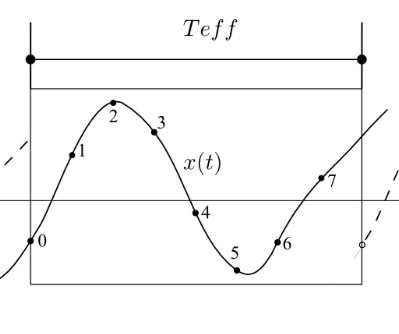
- Linear Regressions are obviously not the best method to use for sinusoidal time series data, we can try LOWESS and Fourier Transforms to get better fits

Temperature (K) Regression Values: 
Regression Start:  266.81342910776164 Regression End:  271.9728514981131
Regression Start:  274.12218308784026 Regression End:  272.54506056810516
Regression Start:  276.65864408076425 Regression End:  270.0224295932324
Radiation Regression Values: 
Regression Start:  89.84341677428297 Regression End:  69.40309274259585
Regression Start:  86.22942321440478 Regression End:  64.34053742115479
Regression Start:  93.79561912143507 Regression End:  52.078063202679544
SO2 Regression Values: 
Regression Start:  0.0041535509293599854 Regression End:  0.0037440711036421164
Regression Start:  0.004173438623650626 Regression End:  0.0038763279203564353
Regression Start:  0.004614597097526448 Regression End:  0.0034604970723163667
NO2 Regression Values: 
Regression Start:  0.038262594524656315 Regression End:  0.03737845496722244
Regression Start:  0.04085550567023403 Regression End:  0.03570797078050073
Regression Start:  0.0550593290389232 Regression End:  0.0

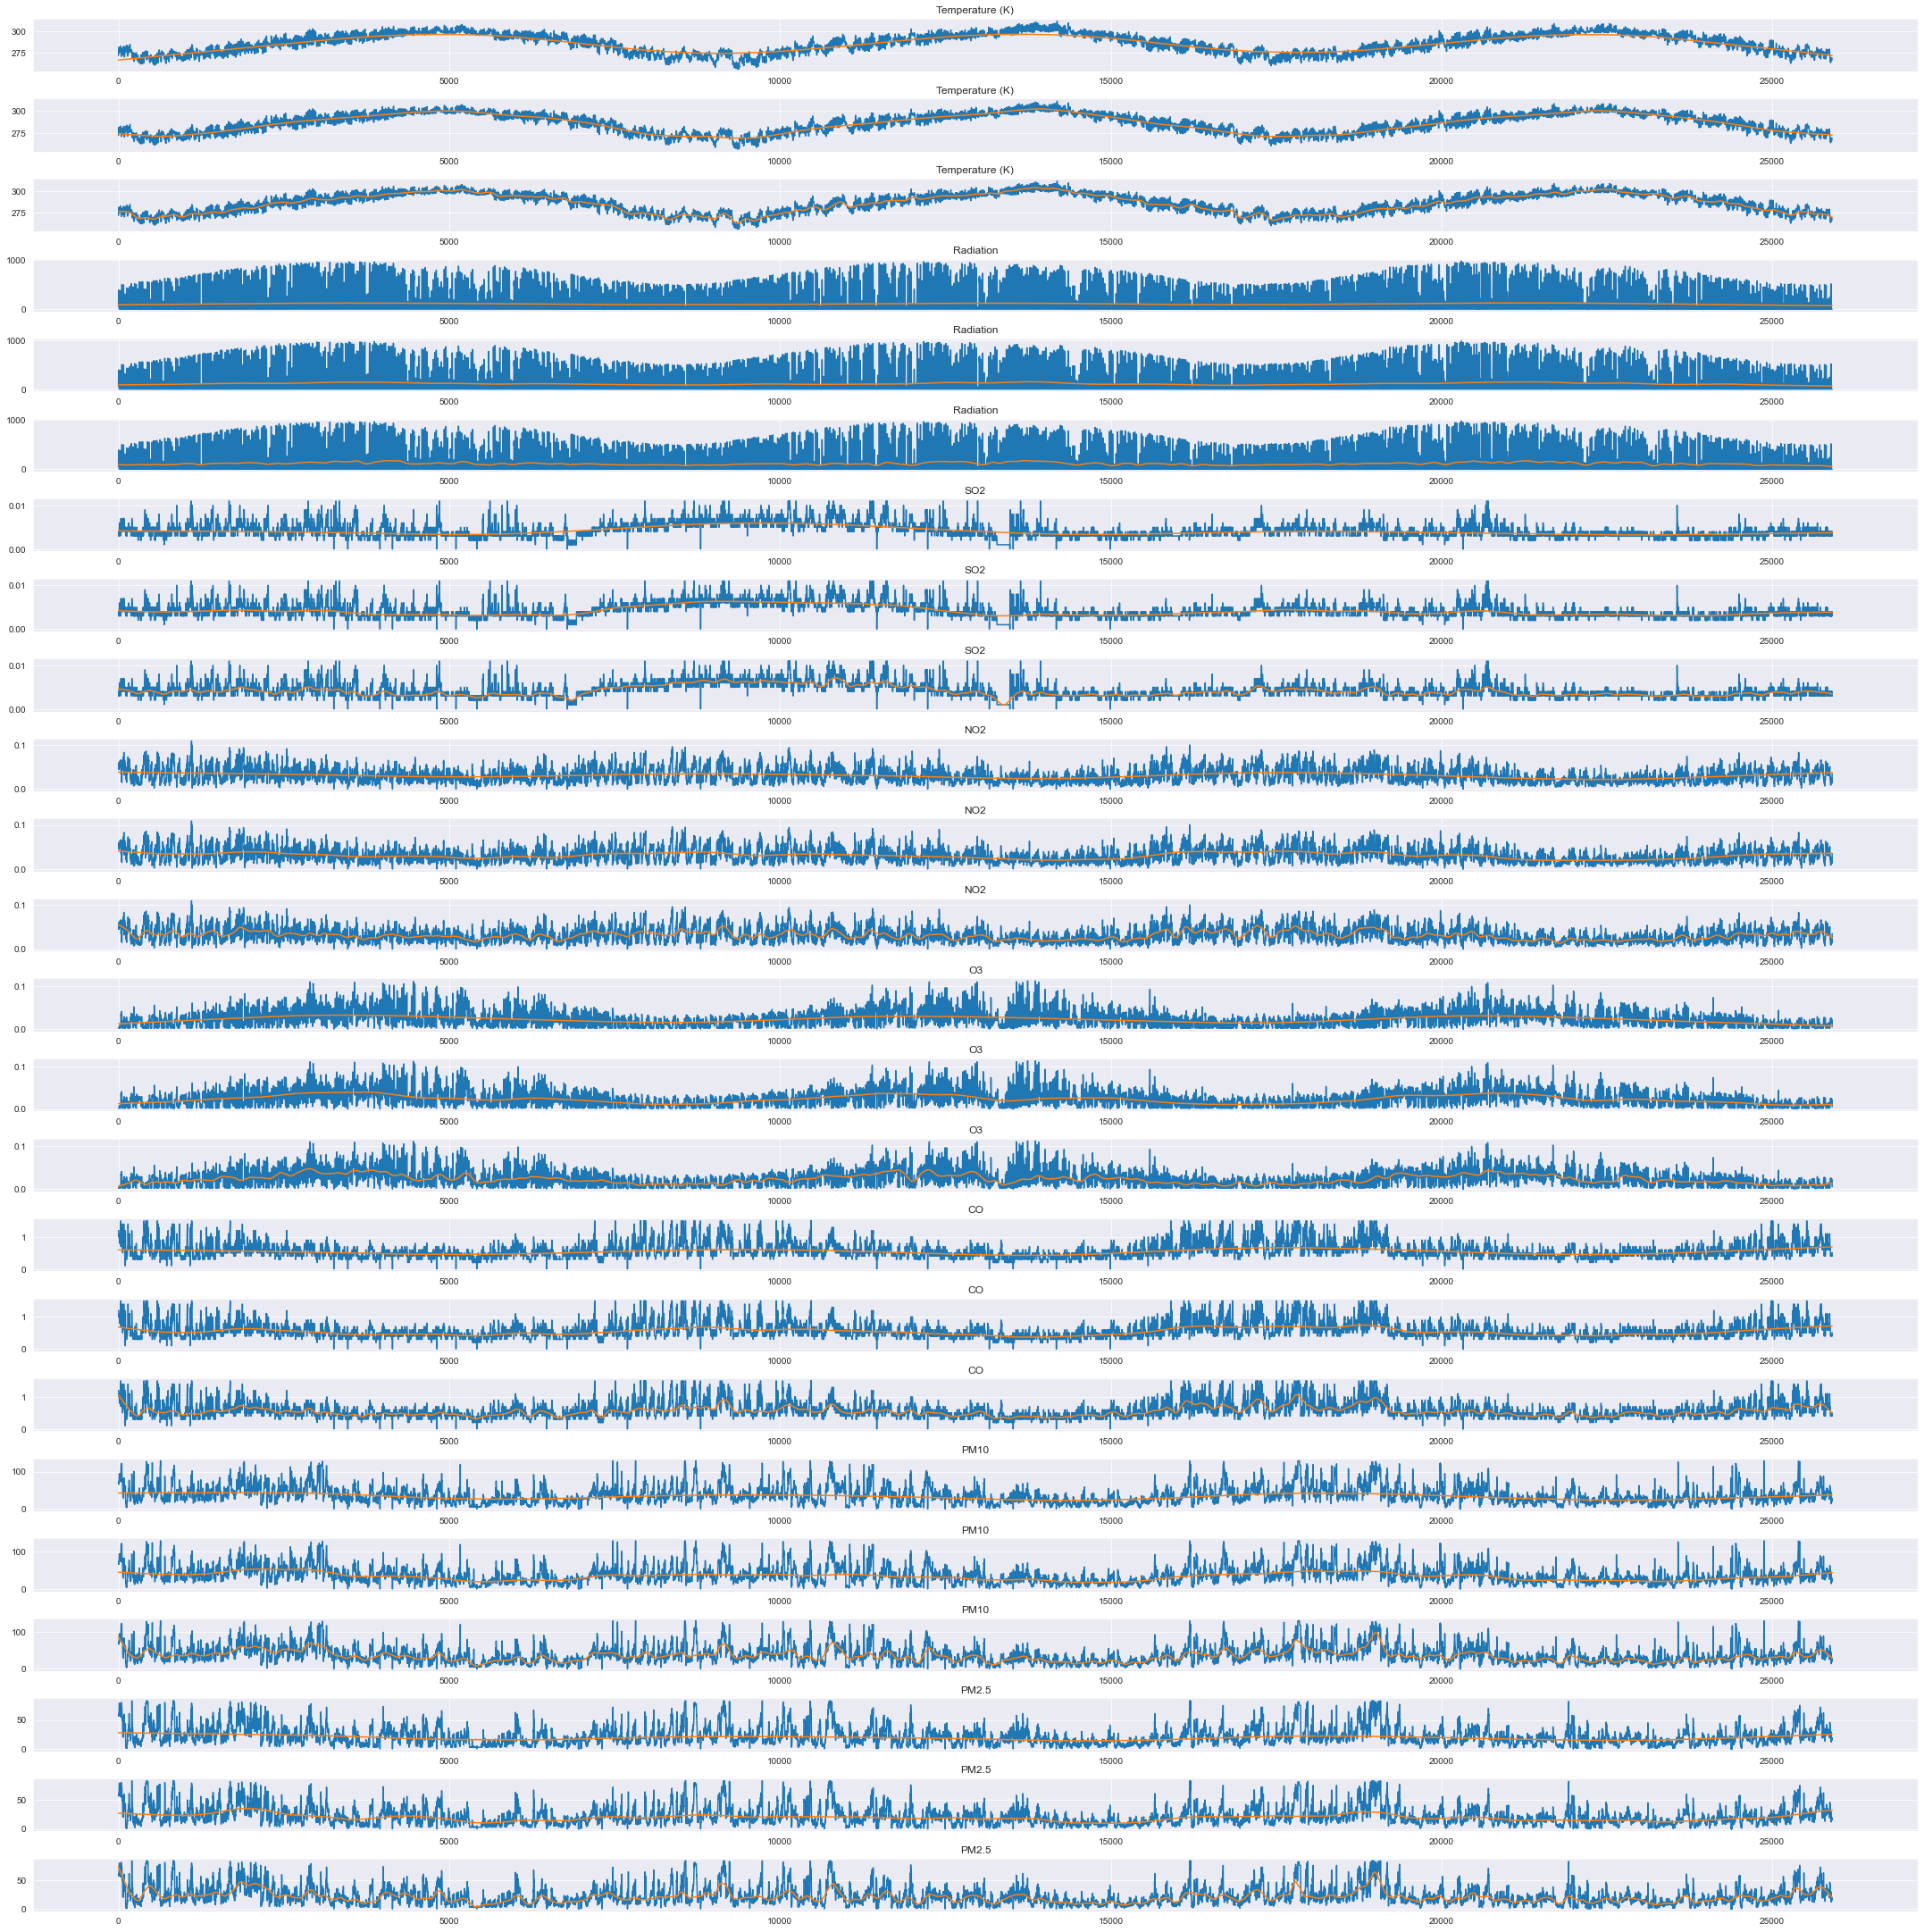

time: 3min 50s


In [6]:
# NOTE: this cell's runtime is ~ 4 minutes because it is running 24 LOWESS regressions
fig, axs = plt.subplots(24,1, figsize = (30, 30))
fig.tight_layout()

# determines strength of fit to local points, lower numbers indicate increased strength
frac_list = [0.2, 0.05, 0.01]

counter = 0
for item in components:
    print(f"{item} Regression Values: ")
    for f_val in frac_list:
        # https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
        lowess_model = sm.nonparametric.lowess(df[item], df.index, frac=f_val, return_sorted = False)
        print("Regression Start: ", lowess_model[0], "Regression End: ", lowess_model[-1])
        
        axs[counter].plot(df[item]); plt.grid()
        axs[counter].plot(lowess_model)
        axs[counter].set_title(item); axs[counter].grid()
        
        counter += 1    

We can add columns on to the dataframe that represent time in a different way. The datetime object is not very accessible for regression, but if we have numerical values for "day of year", "month of year", representing season using one-hot encoders, etc.

In [7]:
df["Time"] = pd.to_datetime(df["Time"])
# Note: Seoul is +9 hours from UTC, so 8 AM Seoul == 17 UTC, 8 PM Seoul == 5 UTC
# 5 <= night < 17 
df["Nighttime"] = 1*((df["Time"].dt.hour >= 5) & (df["Time"].dt.hour < 17))
df["Year"] = df["Time"].dt.year
df["Day of Month"] = df["Time"].dt.day
df["Day of Year"] = df["Time"].dt.dayofyear
df["Month of Year"] = df["Time"].dt.month
df["Season (Num)"] = df["Month of Year"]%12 // 3 + 1
df["Winter"] = 1*(df["Season (Num)"] == 1)
df["Spring"] = 1*(df["Season (Num)"] == 2)
df["Summer"] = 1*(df["Season (Num)"] == 3)
df["Fall"] = 1*(df["Season (Num)"] == 4)
df

Time  Temperature (K)   Radiation    SO2    NO2     O3  \
0     2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1     2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2     2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3     2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4     2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                   ...              ...         ...    ...    ...    ...   
25900 2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901 2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902 2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903 2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904 2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  Nighttime  Year  Day of Month  Day of Year  \
0      1.2  73.0   57.0          0  2017             1            1   
1      1.2  71.0   59.0          0  2017             1            1   
2      1.2  70.0   59.0          0  2017             1            1   
3      1.2  70.0   58.0          0  2017             1            1   
4      1.2  69.0   61.0          0  2017             1            1   
...    ...   ...    ...        ...   ...           ...          ...   
25900  0.5  26.0   19.0          0  2019            31          365   
25901  0.4  27.0   19.0          0  2019            31          365   
25902  0.4  23.0   18.0          0  2019            31          365   
25903  0.5  20.0   19.0          0  2019            31          365   
25904  0.5  20.0   15.0          0  2019            31          365   

       Month of Year  Season (Num)  Winter  Spring  Summer  Fall  
0                  1             1       1       0       0     0  
1                  1             1       1       0       0     0  
2                  1             1       1       0       0     0  
3                  1             1       1       0       0     0  
4                  1             1       1       0       0     0  
...              ...           ...     ...     ...     ...   ...  
25900             12             1       1       0       0     0  
25901             12             1       1       0       0     0  
25902             12             1       1       0       0     0  
25903             12             1       1       0       0     0  
25904             12             1       1       0       0     0  

[25905 rows x 19 columns]

time: 48 ms


### Correlations 
Which variables are most strongly covariated over the length of our time series?

In [8]:
corrs = df[['Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr()
corrs

Temperature (K)  Radiation       SO2       NO2        O3  \
Temperature (K)         1.000000   0.327442 -0.323313 -0.219107  0.211692   
Radiation               0.327442   1.000000 -0.115766 -0.052408 -0.204180   
SO2                    -0.323313  -0.115766  1.000000  0.415373  0.073214   
NO2                    -0.219107  -0.052408  0.415373  1.000000 -0.455648   
O3                      0.211692  -0.204180  0.073214 -0.455648  1.000000   
CO                     -0.341276  -0.029784  0.413599  0.817397 -0.400581   
PM10                   -0.285083  -0.052320  0.507411  0.505798  0.022536   
PM2.5                  -0.237646  -0.032402  0.479769  0.559960 -0.032469   

                       CO      PM10     PM2.5  
Temperature (K) -0.341276 -0.285083 -0.237646  
Radiation       -0.029784 -0.052320 -0.032402  
SO2              0.413599  0.507411  0.479769  
NO2              0.817397  0.505798  0.559960  
O3              -0.400581  0.022536 -0.032469  
CO               1.000000  0.601267  0.678054  
PM10             0.601267  1.000000  0.864130  
PM2.5            0.678054  0.864130  1.000000

time: 21 ms


[Text(0.5, 1.0, 'Air Pollutant Correlations')]

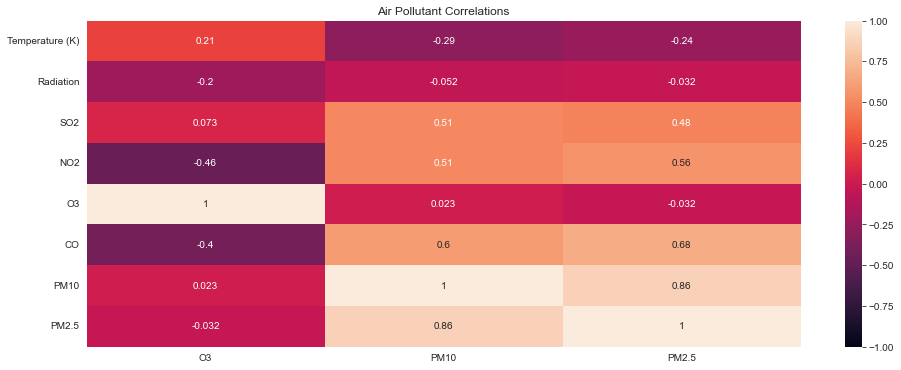

time: 210 ms


In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(corrs[['O3', 'PM10', 'PM2.5']], vmin=-1, vmax=1, annot=True).set(title='Air Pollutant Correlations')

- Temperature modestly correlates with ozone
- PM2.5, CO,NO2, and SO2 correlate strongly with PM10
- PM10, CO, NO2, and SO2 correlate strongly with PM2.5

In [10]:
for item in components:
    print(f"\n{item} Correlations:\n", corrs[item].sort_values(ascending=False))


Temperature (K) Correlations:
 Temperature (K)    1.000000
Radiation          0.327442
O3                 0.211692
NO2               -0.219107
PM2.5             -0.237646
PM10              -0.285083
SO2               -0.323313
CO                -0.341276
Name: Temperature (K), dtype: float64

Radiation Correlations:
 Radiation          1.000000
Temperature (K)    0.327442
CO                -0.029784
PM2.5             -0.032402
PM10              -0.052320
NO2               -0.052408
SO2               -0.115766
O3                -0.204180
Name: Radiation, dtype: float64

SO2 Correlations:
 SO2                1.000000
PM10               0.507411
PM2.5              0.479769
NO2                0.415373
CO                 0.413599
O3                 0.073214
Radiation         -0.115766
Temperature (K)   -0.323313
Name: SO2, dtype: float64

NO2 Correlations:
 NO2                1.000000
CO                 0.817397
PM2.5              0.559960
PM10               0.505798
SO2                0.4

### Fourier Analysis & Transform
What frequencies are the most important when fitting sinusoids to the air pollution time series? We can then use these these time scales for [min, max, mean] relationships between variables. These time scales could also be useful in figuring out how to cluster our data. 

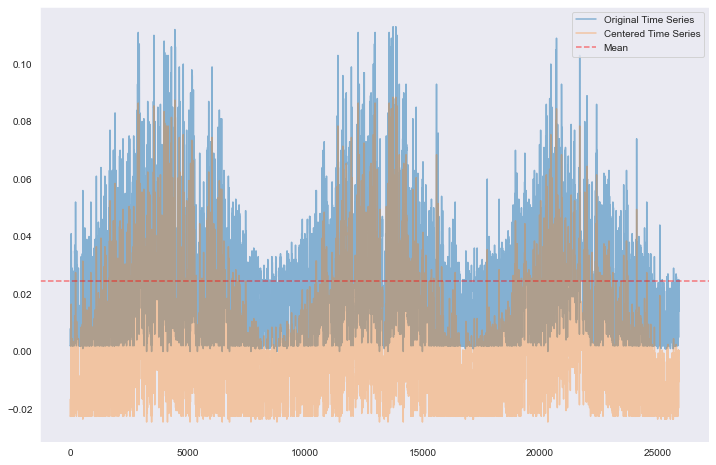

time: 304 ms


In [11]:
# Need to detrend the data in order to obtain actual frequencies
df_idx = df.reset_index()
X = df_idx[["index"]].to_numpy()
centered_o3 = df["O3"].values - df["O3"].mean()

plt.figure(figsize=(12,8))
plt.plot(df["O3"], alpha=0.5, label="Original Time Series")
plt.plot(centered_o3, alpha=0.35, label="Centered Time Series")
plt.axhline(y=df["O3"].mean(), color='red', linestyle='--', label="Mean", alpha=0.5)
plt.legend()

Text(155.0, 0.5, 'Concentration')

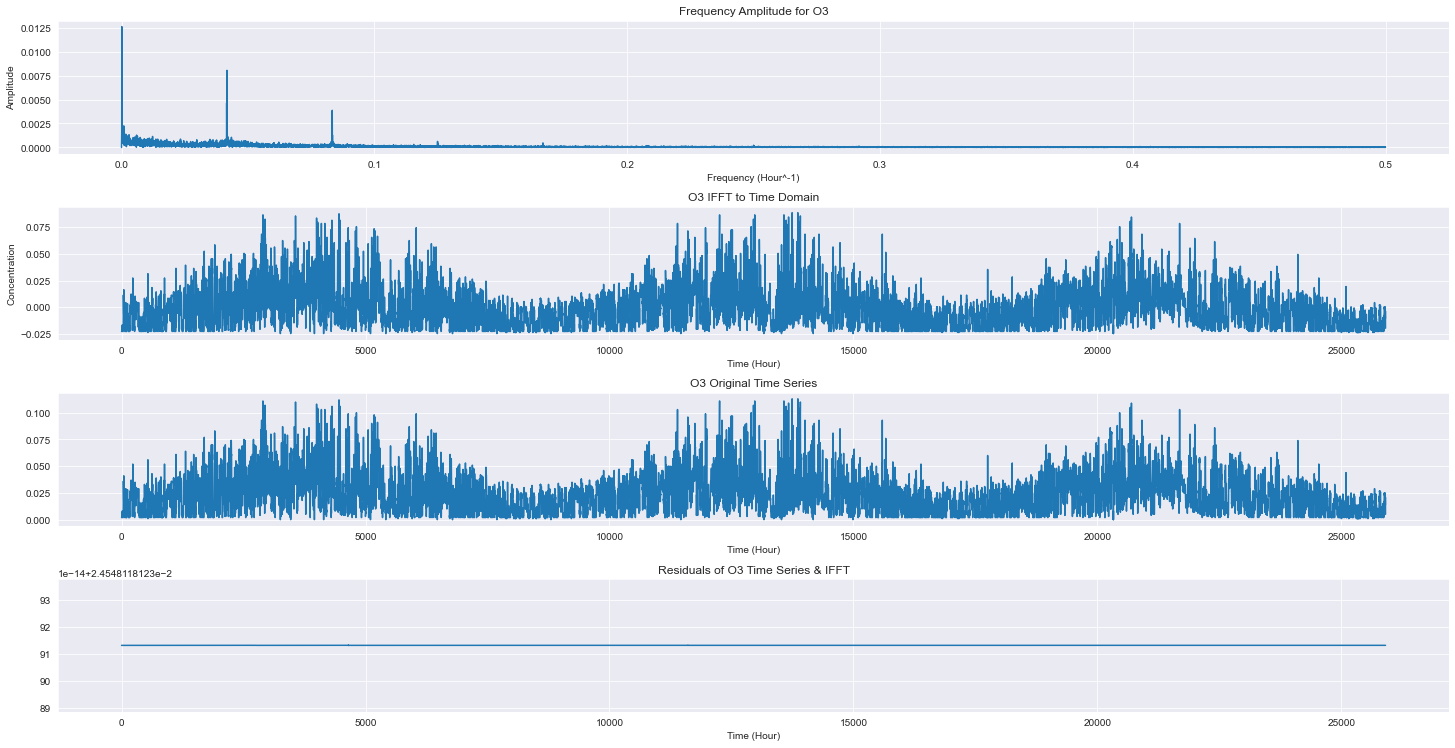

time: 505 ms


In [12]:
# need to specify length of time (N) and sampling frequency (dt)
N = len(df)
dt = 1 # hourly

# FFT
o3_freq = fft(centered_o3)
o3_hour = fftfreq(N, dt)
o3_ifft = ifft(o3_freq)

fig, axs = plt.subplots(4,1, figsize = (20, 12))
fig.tight_layout()

# set the spacing between subplots
plt.subplots_adjust(bottom=0.2, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)

# O3 Frequency Domain
axs[0].plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_freq[0:N//2])); plt.grid()
axs[0].set_title("Frequency Amplitude for O3"); axs[0].grid()
axs[0].set_xlabel("Frequency (Hour^-1)"); axs[0].set_ylabel("Amplitude")

# O3 IFFT to Time Domain
axs[1].plot(o3_ifft); plt.grid()
axs[1].set_title("O3 IFFT to Time Domain"); axs[1].grid()
axs[1].set_xlabel("Time (Hour)"); axs[1].set_ylabel("Concentration")

# O3 Original Time Series
axs[2].plot(df["O3"]); plt.grid()
axs[2].set_title("O3 Original Time Series"); axs[2].grid()
axs[2].set_xlabel("Time (Hour)"); axs[1].set_ylabel("Concentration")

# Residuals between IFFT and Original Time Series
o3_residuals = df["O3"] - o3_ifft
axs[3].plot(o3_residuals); plt.grid()
axs[3].set_title("Residuals of O3 Time Series & IFFT"); axs[3].grid()
axs[3].set_xlabel("Time (Hour)"); axs[1].set_ylabel("Concentration")

In [13]:
# there are 5 noticeable peaks in the frequency spectrum
max_indices = np.argpartition(2.0/N * np.abs(o3_freq[0:N//2]), -5)[-5:]

for idx in max_indices[::-1]:
    print("\nFrequencies of Highest Amplitude: ", o3_hour[idx],
         "\nLength of Hour Cycle: ", 1/o3_hour[idx], 
         "\nCycle in Days: ", (1/o3_hour[idx])/24, 
         "\nAmplitude: ", 2.0/N * np.abs(o3_freq[idx]))


Frequencies of Highest Amplitude:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  0.012595595243823358

Frequencies of Highest Amplitude:  0.04169079328314997 
Length of Hour Cycle:  23.98611111111111 
Cycle in Days:  0.9994212962962963 
Amplitude:  0.00803802025982488

Frequencies of Highest Amplitude:  0.041652190696776684 
Length of Hour Cycle:  24.008341056533826 
Cycle in Days:  1.0003475440222427 
Amplitude:  0.005345294266125753

Frequencies of Highest Amplitude:  0.04157498552403011 
Length of Hour Cycle:  24.05292479108635 
Cycle in Days:  1.0022051996285979 
Amplitude:  0.004624596903646487

Frequencies of Highest Amplitude:  0.08334298397992665 
Length of Hour Cycle:  11.998610467809172 
Cycle in Days:  0.49994210282538215 
Amplitude:  0.0038703724872687886
time: 3.99 ms


The residuals are ridiculously low, so we can be assured that the frequencies pulled out by the FFT are accurate. Removing the trend from the data reduces the amplitude at frequency 0. The frequency with the greatest amplitude (by far) is 1/8635, which is equivalent to a cycle length of approximately 359 days. The next few are frequencies with a cycle length of about 1 day. The last appears to be the diurnal cycle (12-hour period), but this frequency has a very weak amplitude. We can use these time frames to inform which features on which time scales we use as predictors in our machine learning model. 

### Windowing to Reduce Spectral Leakage
We can use a "window" to taper out time series near the end points, which will make it periodic. This will give greater weighting to samples in the middle and reduce the resolution of our transformation, but will also reduce undesirable low-frequecy patterns that are a result of discontinuities. 

Text(155.0, 0.5, 'Concentration')

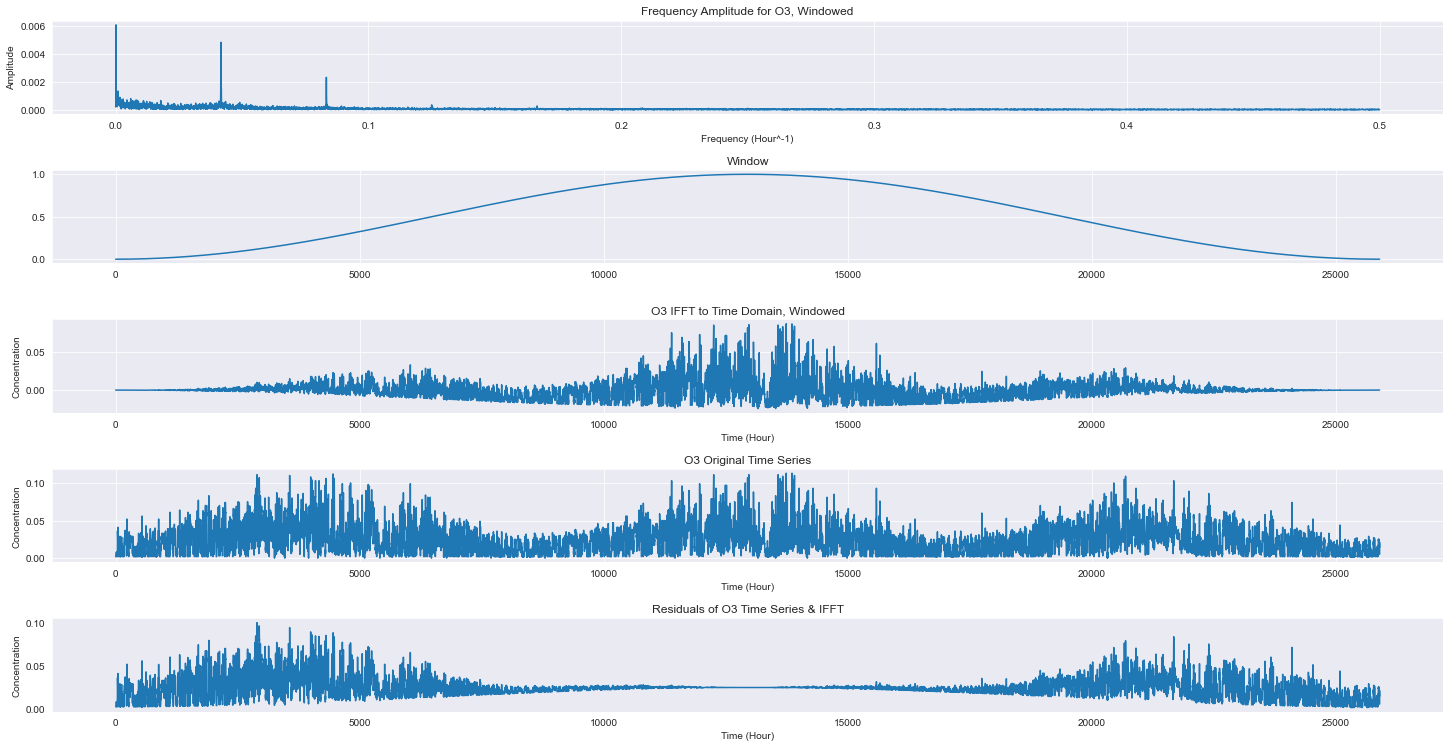

time: 561 ms


In [14]:
from scipy.signal import get_window

w = get_window('hann',N)

# need to specify length of time (N) and sampling frequency (dt)
N = len(df)
dt = 1 # hourly

# FFT
o3_windowed_freq = fft(centered_o3 * w)
o3_windowed_ifft = ifft(o3_windowed_freq)

fig, axs = plt.subplots(5,1, figsize = (20, 12))
fig.tight_layout()

# set the spacing between subplots
plt.subplots_adjust(bottom=0.2, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.6)

# O3 Frequency Domain
axs[0].plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_windowed_freq[0:N//2])); plt.grid()
axs[0].set_title("Frequency Amplitude for O3, Windowed"); axs[0].grid()
axs[0].set_xlabel("Frequency (Hour^-1)"); axs[0].set_ylabel("Amplitude")

# Window
axs[1].plot(w); plt.grid()
axs[1].set_title("Window"); axs[1].grid()

# O3 IFFT to Time Domain
axs[2].plot(o3_windowed_ifft); plt.grid()
axs[2].set_title("O3 IFFT to Time Domain, Windowed"); axs[2].grid()
axs[2].set_xlabel("Time (Hour)"); axs[2].set_ylabel("Concentration")

# O3 Original Time Series
axs[3].plot(df["O3"]); plt.grid()
axs[3].set_title("O3 Original Time Series"); axs[3].grid()
axs[3].set_xlabel("Time (Hour)"); axs[3].set_ylabel("Concentration")

# Residuals between IFFT and Original Time Series
o3_residuals = df["O3"] - o3_windowed_ifft
axs[4].plot(o3_residuals); plt.grid()
axs[4].set_title("Residuals of O3 Time Series & IFFT"); axs[4].grid()
axs[4].set_xlabel("Time (Hour)"); axs[4].set_ylabel("Concentration")

In [15]:
# there are 5 noticeable peaks in the frequency spectrum
max_indices = np.argpartition(2.0/N * np.abs(o3_windowed_freq[0:N//2]), -5)[-5:]

for idx in max_indices[::-1]:
    print("\nFrequencies of Highest Amplitude: ", o3_hour[idx],
         "\nLength of Hour Cycle: ", 1/o3_hour[idx], 
         "\nCycle in Days: ", (1/o3_hour[idx])/24, 
         "\nAmplitude: ", 2.0/N * np.abs(o3_freq[idx]))


Frequencies of Highest Amplitude:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  0.012595595243823358

Frequencies of Highest Amplitude:  0.04169079328314997 
Length of Hour Cycle:  23.98611111111111 
Cycle in Days:  0.9994212962962963 
Amplitude:  0.00803802025982488

Frequencies of Highest Amplitude:  0.041652190696776684 
Length of Hour Cycle:  24.008341056533826 
Cycle in Days:  1.0003475440222427 
Amplitude:  0.005345294266125753

Frequencies of Highest Amplitude:  0.00015441034549314804 
Length of Hour Cycle:  6476.25 
Cycle in Days:  269.84375 
Amplitude:  0.0008362589190787553

Frequencies of Highest Amplitude:  7.720517274657402e-05 
Length of Hour Cycle:  12952.5 
Cycle in Days:  539.6875 
Amplitude:  0.0015574840741970218
time: 3 ms


The windowed FFT returns similar frequencies, with the yearly having the greatest amplitude by far. Daily frequencies are the second most important group. The last two frequencies seen, 269 and 539 days, have low magnitudes and do not make intuitive sense. Since these did not show up in the original FFT, we can assume they are products of distortion by windowing. 

### Zero Padding 
The FFT algorithm is most efficient when working with datasets of length 2^n. Zero padding can also increase resolution through increasing the number of frequency bins. 

In [16]:
def next_pow_2(x):
    return 1 if x==0 else 2**(math.ceil(math.log2(x)))

# Use to increase length of dataset
N_padded = next_pow_2(N)
N_padded

32768

time: 2 ms


Text(155.0, 0.5, 'Concentration')

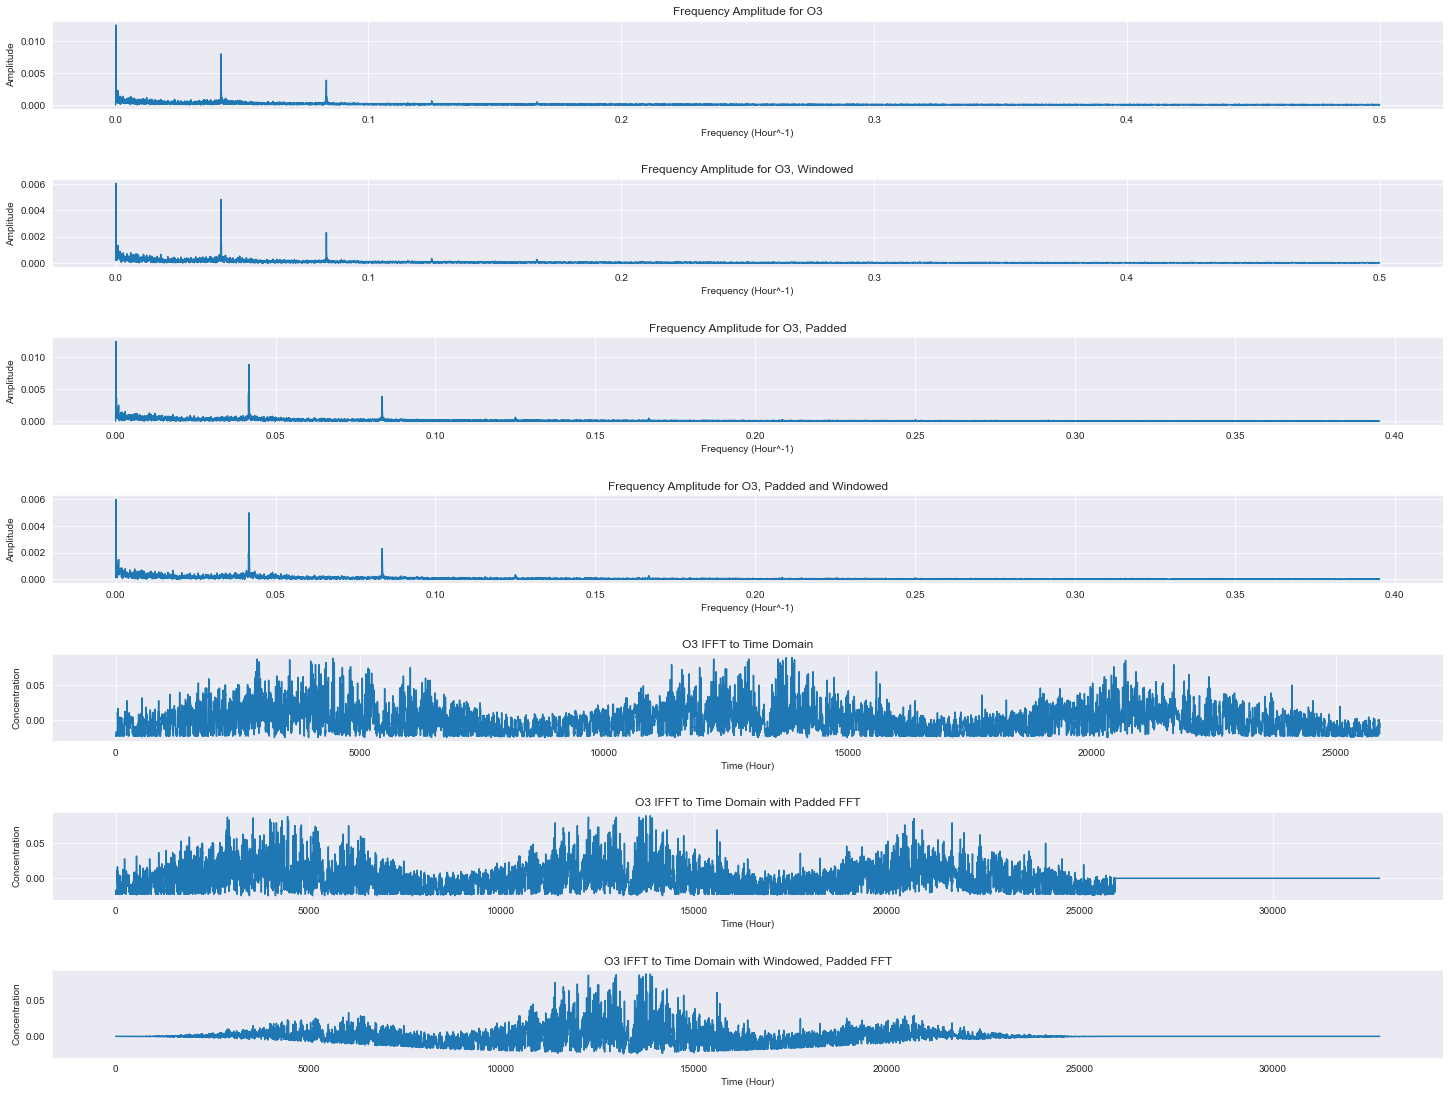

time: 975 ms


In [17]:
# We can use the padded length on both the original and windowed data
o3_padded_freq = fft(centered_o3, N_padded)
o3_padded_windowed_freq = fft(centered_o3 * w, N_padded)
o3_padded_hour = fftfreq(N_padded, dt)
o3_padded_ifft = ifft(o3_padded_freq)
o3_padded_windowed_ifft = ifft(o3_padded_windowed_freq)

fig, axs = plt.subplots(7,1, figsize = (20, 18))
fig.tight_layout()

# set the spacing between subplots
plt.subplots_adjust(bottom=0.2, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.8)

# O3 Original Frequency Domain
axs[0].plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_freq[0:N//2])); plt.grid()
axs[0].set_title("Frequency Amplitude for O3"); axs[0].grid()
axs[0].set_xlabel("Frequency (Hour^-1)"); axs[0].set_ylabel("Amplitude")

# O3 Windowed Frequency Domain
axs[1].plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_windowed_freq[0:N//2])); plt.grid()
axs[1].set_title("Frequency Amplitude for O3, Windowed"); axs[1].grid()
axs[1].set_xlabel("Frequency (Hour^-1)"); axs[1].set_ylabel("Amplitude")

# O3 Padded Frequency Domain
axs[2].plot(o3_padded_hour[0:N//2], 2.0/N * np.abs(o3_padded_freq[0:N//2])); plt.grid()
axs[2].set_title("Frequency Amplitude for O3, Padded"); axs[2].grid()
axs[2].set_xlabel("Frequency (Hour^-1)"); axs[2].set_ylabel("Amplitude")

# O3 Windowed, Padded Frequency Domain
axs[3].plot(o3_padded_hour[0:N//2], 2.0/N * np.abs(o3_padded_windowed_freq[0:N//2])); plt.grid()
axs[3].set_title("Frequency Amplitude for O3, Padded and Windowed"); axs[3].grid()
axs[3].set_xlabel("Frequency (Hour^-1)"); axs[3].set_ylabel("Amplitude")

# O3 IFFT Original
axs[4].plot(o3_ifft); plt.grid()
axs[4].set_title("O3 IFFT to Time Domain"); axs[4].grid()
axs[4].set_xlabel("Time (Hour)"); axs[4].set_ylabel("Concentration")

# O3 IFFT for Padded
axs[5].plot(o3_padded_ifft); plt.grid()
axs[5].set_title("O3 IFFT to Time Domain with Padded FFT"); axs[5].grid()
axs[5].set_xlabel("Time (Hour)"); axs[5].set_ylabel("Concentration")

# O3 IFFT for Padded, Windowed
axs[6].plot(o3_padded_windowed_ifft); plt.grid()
axs[6].set_title("O3 IFFT to Time Domain with Windowed, Padded FFT"); axs[6].grid()
axs[6].set_xlabel("Time (Hour)"); axs[6].set_ylabel("Concentration")

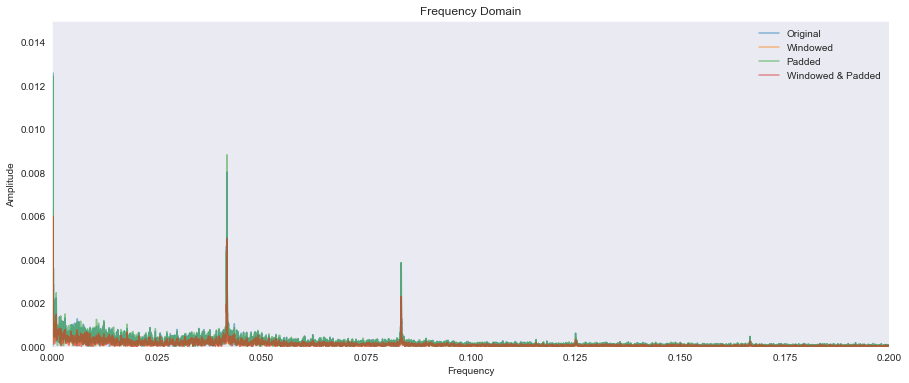

time: 176 ms


In [18]:
plt.figure(figsize=(15,6))
ax = plt.gca()
ax.plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_freq[0:N//2]), label="Original", alpha=0.5)
ax.plot(o3_hour[0:N//2], 2.0/N * np.abs(o3_windowed_freq[0:N//2]), label="Windowed", alpha=0.5)
ax.plot(o3_padded_hour[0:N//2], 2.0/N * np.abs(o3_padded_freq[0:N//2]), label="Padded", alpha=0.5)
ax.plot(o3_padded_hour[0:N//2], 2.0/N * np.abs(o3_padded_windowed_freq[0:N//2]), label="Windowed & Padded", alpha=0.5)
ax.set_title('Frequency Domain')
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.015])
ax.legend(frameon=False)

In [19]:
# there are 5 noticeable peaks in the frequency spectrum
max_indices = np.argpartition(2.0/N * np.abs(o3_padded_freq[0:N//2]), -5)[-5:]

for idx in max_indices[::-1]:
    print("\nFrequencies of Highest Amplitude: ", o3_hour[idx],
         "\nLength of Hour Cycle: ", 1/o3_hour[idx], 
         "\nCycle in Days: ", (1/o3_hour[idx])/24, 
         "\nAmplitude: ", 2.0/N * np.abs(o3_freq[idx]))


Frequencies of Highest Amplitude:  0.00015441034549314804 
Length of Hour Cycle:  6476.25 
Cycle in Days:  269.84375 
Amplitude:  0.0008362589190787553

Frequencies of Highest Amplitude:  0.052731132985910055 
Length of Hour Cycle:  18.964128843338216 
Cycle in Days:  0.7901720351390923 
Amplitude:  0.00026595869054430577

Frequencies of Highest Amplitude:  0.052692530399536766 
Length of Hour Cycle:  18.978021978021978 
Cycle in Days:  0.7907509157509157 
Amplitude:  7.069677520627012e-05

Frequencies of Highest Amplitude:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  0.012595595243823358

Frequencies of Highest Amplitude:  0.052576722640416906 
Length of Hour Cycle:  19.019823788546255 
Cycle in Days:  0.7924926578560939 
Amplitude:  0.0003825945076998324
time: 3 ms


### Derived Features
All methods show the same frequencies dominating, so we can be very confident that the yearly and daily are the most important timeframes.The padded frequencies seem to also include a peak around a frequency with cycle length of 269 days. We can investigate this further to see if this is an important time frame, but at the moment there is no intuitive explaination besides distortion from padding and windowing. 

We can derive some features using the [mean, min, max] over time frames that the FFT showed as important, especially daily and yearly.

In [20]:
diurnal_grouped = df[components].groupby([df["Year"], df["Day of Year"], df["Nighttime"]])
daily_grouped = df[components].groupby([df["Year"], df["Day of Year"]])
seasonal_grouped = df[components].groupby([df["Year"], df["Season (Num)"]])
yearly_grouped = df[components].groupby(df["Year"])

time: 14 ms


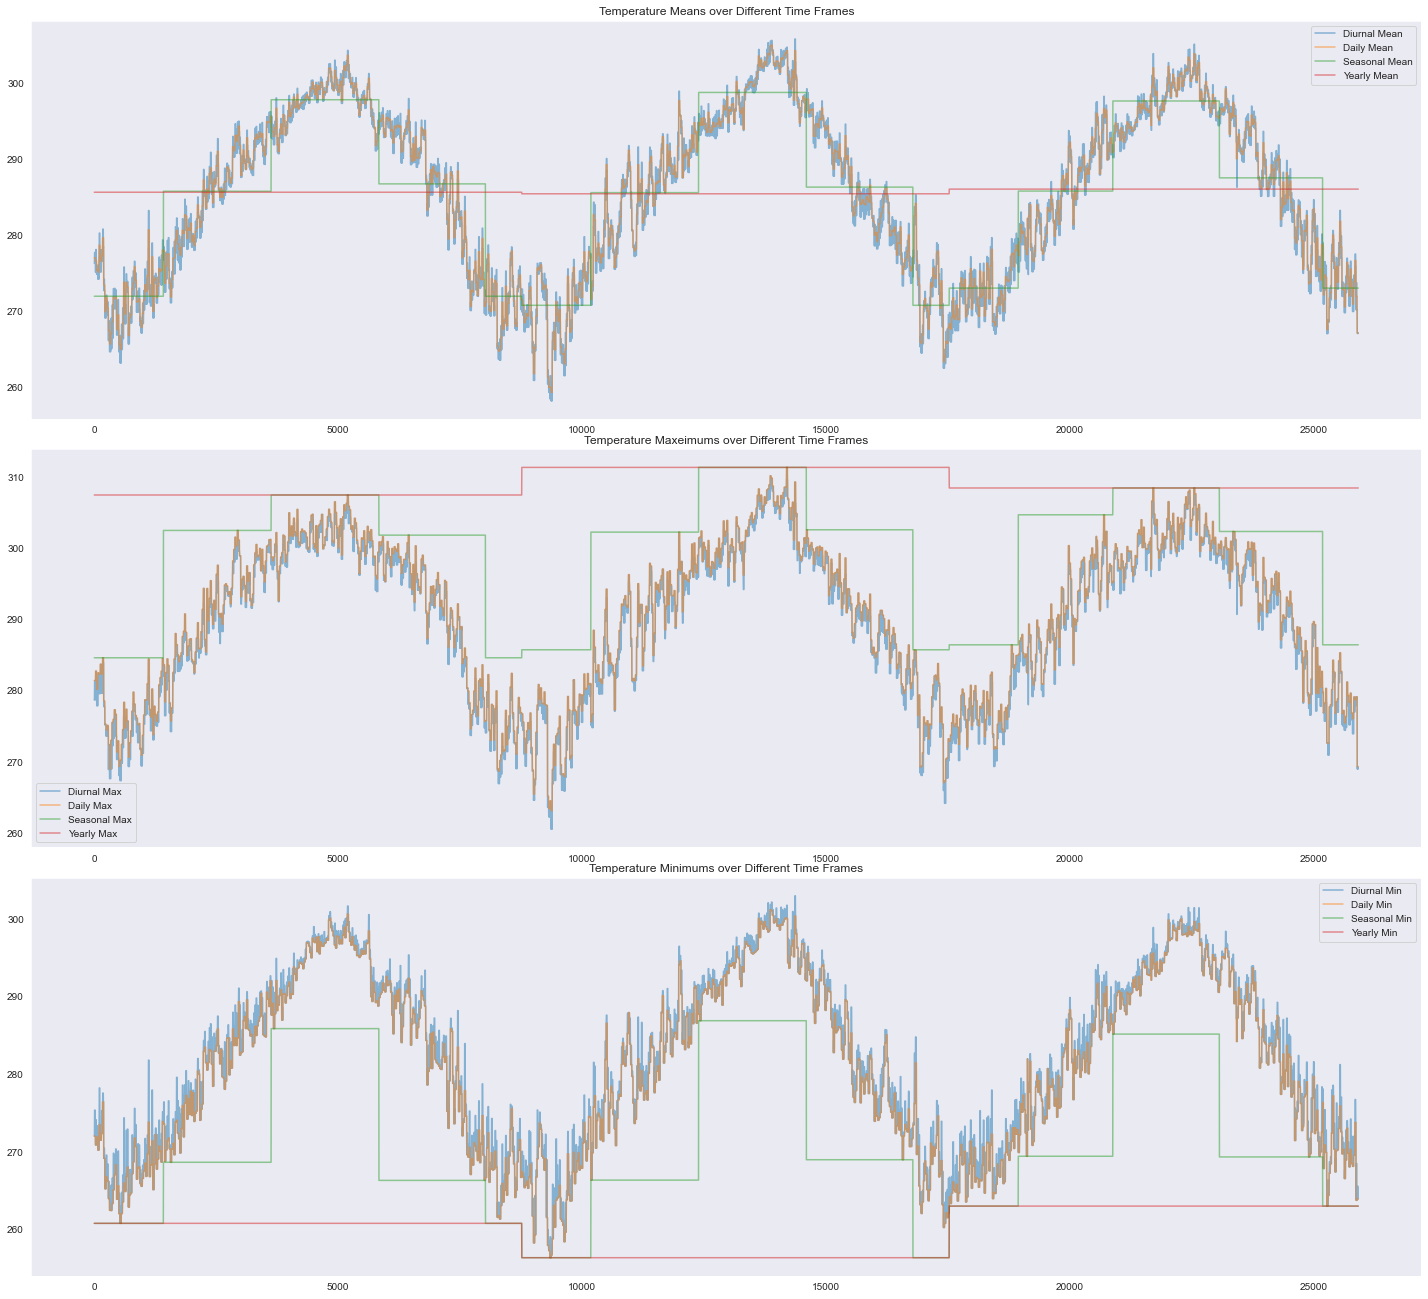

time: 1.74 s


In [152]:
fig, axs = plt.subplots(3,1, figsize = (20, 18))
fig.tight_layout()



axs[0].plot(diurnal_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Diurnal Mean")
axs[0].plot(daily_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Daily Mean")
axs[0].plot(seasonal_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Seasonal Mean")
axs[0].plot(yearly_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Yearly Mean")
axs[0].set_title("Temperature Means over Different Time Frames")
axs[0].legend()

axs[1].plot(diurnal_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Diurnal Max")
axs[1].plot(daily_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Daily Max")
axs[1].plot(seasonal_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Seasonal Max")
axs[1].plot(yearly_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Yearly Max")
axs[1].set_title("Temperature Maxeimums over Different Time Frames")
axs[1].legend()

axs[2].plot(diurnal_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Diurnal Min")
axs[2].plot(daily_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Daily Min")
axs[2].plot(seasonal_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Seasonal Min")
axs[2].plot(yearly_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Yearly Min")
axs[2].set_title("Temperature Minimums over Different Time Frames")
axs[2].legend()

plt.legend()

In [22]:
for item in components:
    for stat in ["mean", "min", "max"]:
        df[f"{item}_diurnal_{stat}"] = diurnal_grouped.transform(stat)[item]
        df[f"{item}_daily_{stat}"] = daily_grouped.transform(stat)[item]
        df[f"{item}_seasonal_{stat}"] = seasonal_grouped.transform(stat)[item]
        df[f"{item}_yearly_{stat}"] = yearly_grouped.transform(stat)[item]

time: 234 ms


### Correlations and Cross-Correlations

We will use Pearson Correlation to see which variablles are linearly correlates with the three pollutants we are interested in. Then, we will see what the cross correlations are for these variables and what lag shows the greatest correlation. The cross correlation will be important for figuring out which features are important for a machine learning model since it shows how previous data informs the future state of our features of interest. 

[Text(0.5, 1.0, 'Air Pollutant Correlations')]

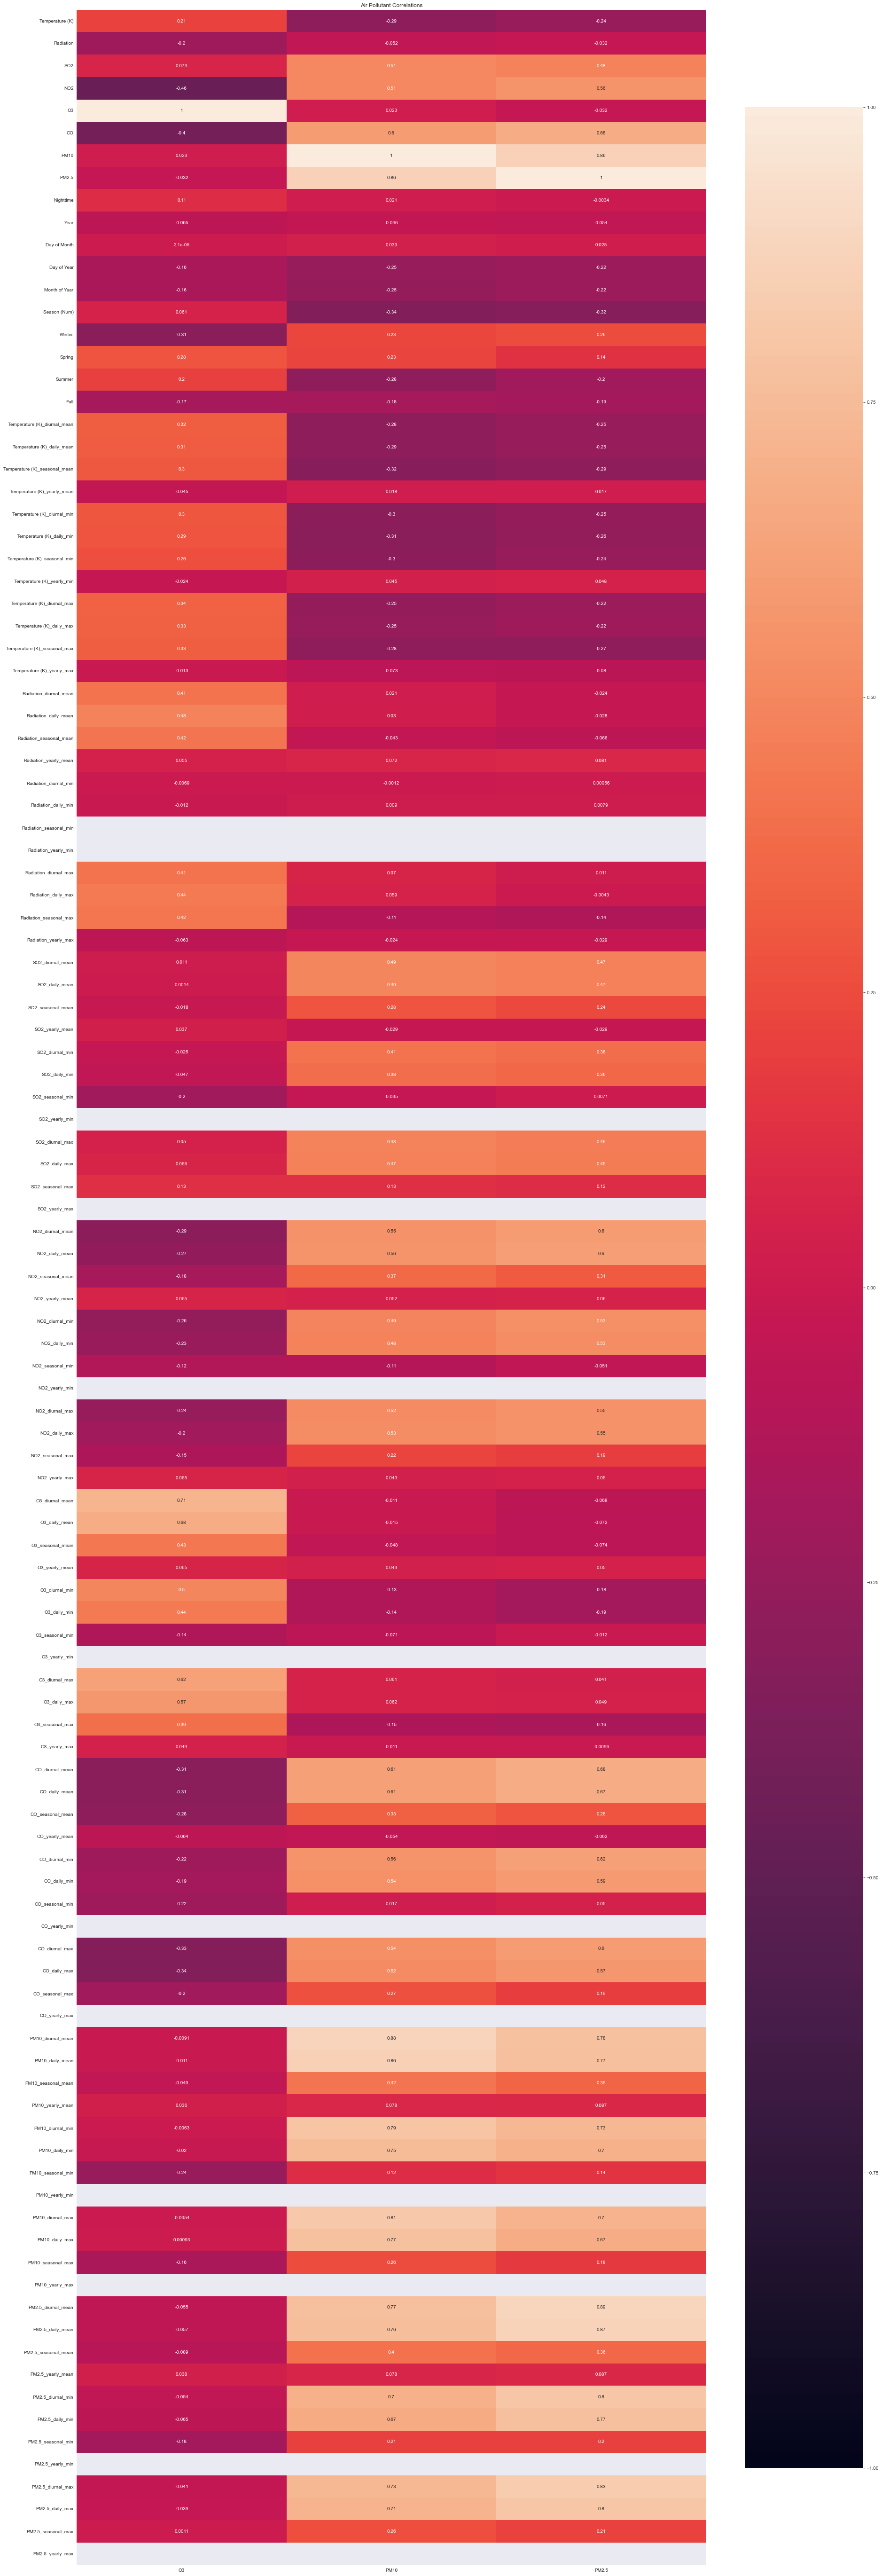

time: 2.46 s


In [23]:
plt.figure(figsize=(30, 100))
extended_corrs = df.corr()
sns.heatmap(extended_corrs[['O3', 'PM10', 'PM2.5']], vmin=-1, vmax=1, annot=True).set(title='Air Pollutant Correlations')

In [139]:
# Sort by highest non-O3 Pearson correlations
o3_corr = pd.DataFrame(extended_corrs["O3"].sort_values(ascending=False, key=lambda x: abs(x)))
o3_corr_ri = o3_corr.reset_index()
o3_variables = [x for x in o3_corr_ri["index"] if x[0:2] != ("O3")]
o3_corr_ri.rename(columns={"index":"variable"}, inplace=True)
o3_corr_ri = o3_corr_ri[o3_corr_ri.variable.isin(o3_variables)]
o3_highest_corr = o3_corr_ri.head(50)
o3_highest_corr

variable        O3
6            Radiation_daily_mean  0.480668
7                             NO2 -0.455648
9             Radiation_daily_max  0.438868
11         Radiation_seasonal_max  0.422370
12        Radiation_seasonal_mean  0.421292
13         Radiation_diurnal_mean  0.411888
14          Radiation_diurnal_max  0.410064
15                             CO -0.400581
17    Temperature (K)_diurnal_max  0.343290
18                   CO_daily_max -0.341282
19      Temperature (K)_daily_max  0.334389
20                 CO_diurnal_max -0.330463
21   Temperature (K)_seasonal_max  0.326337
22   Temperature (K)_diurnal_mean  0.322587
23     Temperature (K)_daily_mean  0.314705
24                CO_diurnal_mean -0.308159
25                         Winter -0.305703
26                  CO_daily_mean -0.305012
27  Temperature (K)_seasonal_mean  0.298668
28    Temperature (K)_diurnal_min  0.296735
29               NO2_diurnal_mean -0.293336
30      Temperature (K)_daily_min  0.288775
31               CO_seasonal_mean -0.284680
32                         Spring  0.282120
33                 NO2_daily_mean -0.269059
34   Temperature (K)_seasonal_min  0.263015
35                NO2_diurnal_min -0.259753
36                NO2_diurnal_max -0.244071
37              PM10_seasonal_min -0.235609
38                  NO2_daily_min -0.230711
39                 CO_diurnal_min -0.218047
40                CO_seasonal_min -0.216767
41                Temperature (K)  0.211692
42                      Radiation -0.204180
43               SO2_seasonal_min -0.201628
44                CO_seasonal_max -0.200576
45                  NO2_daily_max -0.199498
46                         Summer  0.198223
47                   CO_daily_min -0.186627
48             PM2.5_seasonal_min -0.180378
49              NO2_seasonal_mean -0.175544
50                           Fall -0.174166
51                    Day of Year -0.163233
52                  Month of Year -0.161759
53              PM10_seasonal_max -0.161661
54               NO2_seasonal_max -0.146363
56               SO2_seasonal_max  0.125525
57               NO2_seasonal_min -0.120476
58                      Nighttime  0.110958
59            PM2.5_seasonal_mean -0.088645

time: 24 ms


In [143]:
# Sort by Cross Correlation and Lag
o3_max_corrs = pd.DataFrame(index=range(len(o3_highest_corr)), columns=["Var", "Corr", "Lag"])

for idx, var in enumerate(o3_highest_corr["variable"]):
    cross_corr = sm.tsa.stattools.ccf(df["O3"], df[var], adjusted=False)
    max_idx = abs(cross_corr).argmax()
    
    o3_max_corrs["Var"][idx] = var
    o3_max_corrs["Corr"][idx] = cross_corr[max_idx]
    o3_max_corrs["Lag"][idx] = max_idx
    o3_max_corrs.append(new_row, ignore_index=True)
    
o3_max_corrs.sort_values(by=["Corr", "Lag"], ascending=False, key=lambda x: abs(x))

Var      Corr   Lag
33                      Radiation  0.628369    11
5          Radiation_diurnal_mean  0.503075    16
0            Radiation_daily_mean  0.480668     0
32                Temperature (K) -0.474392  3260
1                             NO2 -0.455648     0
19    Temperature (K)_diurnal_min -0.454552  3256
13   Temperature (K)_diurnal_mean  -0.45296  3256
2             Radiation_daily_max  0.438868     0
8     Temperature (K)_diurnal_max -0.438842  3256
14     Temperature (K)_daily_mean -0.431175  3252
21      Temperature (K)_daily_min -0.429587  3250
10      Temperature (K)_daily_max -0.423275  3252
3          Radiation_seasonal_max   0.42237     0
4         Radiation_seasonal_mean  0.421327    12
18  Temperature (K)_seasonal_mean  -0.41946  2853
6           Radiation_diurnal_max  0.410064     0
12   Temperature (K)_seasonal_max -0.405588  2853
7                              CO -0.400581     0
25   Temperature (K)_seasonal_min -0.396963  3117
40              NO2_seasonal_mean  0.391235  2853
22               CO_seasonal_mean  0.391026  2853
49            PM2.5_seasonal_mean  0.389623  2427
48                      Nighttime  0.381595     5
23                         Spring  0.380605   737
43                  Month of Year -0.380143  1510
42                    Day of Year -0.379083  1509
41                           Fall -0.364609  1269
16                         Winter   0.35613  2848
37                         Summer -0.342223  3462
9                    CO_daily_max -0.341282     0
35                CO_seasonal_max  0.340814  3462
11                 CO_diurnal_max -0.330463     0
15                CO_diurnal_mean -0.308159     0
17                  CO_daily_mean -0.305012     0
45               NO2_seasonal_max  0.303087  3140
44              PM10_seasonal_max   0.30171  3289
20               NO2_diurnal_mean -0.296941     1
27                NO2_diurnal_max -0.270967     3
24                 NO2_daily_mean -0.269059     0
26                NO2_diurnal_min -0.259753     0
28              PM10_seasonal_min -0.235609     0
29                  NO2_daily_min -0.230711     0
30                 CO_diurnal_min  0.229918  3149
38                   CO_daily_min   0.22601  2721
36                  NO2_daily_max  0.222777  2722
46               SO2_seasonal_max  0.222229  1148
31                CO_seasonal_min -0.217199    13
34               SO2_seasonal_min -0.202816    14
39             PM2.5_seasonal_min -0.180378     0
47               NO2_seasonal_min -0.145837   819

time: 8.5 s


In [144]:
pm25_corr = pd.DataFrame(extended_corrs["PM2.5"].sort_values(ascending=False, key=lambda x: abs(x)))
pm25_corr_ri = pm25_corr.reset_index()
pm25_variables = [x for x in pm25_corr_ri["index"] if x[0:3] != ("PM2")]
pm25_corr_ri.rename(columns={"index":"variable"}, inplace=True)
pm25_corr_ri = pm25_corr_ri[pm25_corr_ri.variable.isin(pm25_variables)]
pm25_highest_corr = pm25_corr_ri.head(50)
pm25_highest_corr

variable     PM2.5
3                            PM10  0.864130
7               PM10_diurnal_mean  0.779533
8                 PM10_daily_mean  0.768244
10               PM10_diurnal_min  0.727341
11               PM10_diurnal_max  0.704667
12                 PM10_daily_min  0.696588
13                             CO  0.678054
14                CO_diurnal_mean  0.675851
15                  CO_daily_mean  0.673344
16                 PM10_daily_max  0.672367
17                 CO_diurnal_min  0.616977
18                 NO2_daily_mean  0.604110
19                 CO_diurnal_max  0.595872
20               NO2_diurnal_mean  0.595103
21                   CO_daily_min  0.590869
22                   CO_daily_max  0.571000
23                            NO2  0.559960
24                  NO2_daily_max  0.551165
25                NO2_diurnal_max  0.547331
26                NO2_diurnal_min  0.532805
27                  NO2_daily_min  0.529935
28                            SO2  0.479769
29               SO2_diurnal_mean  0.469243
30                 SO2_daily_mean  0.468906
31                SO2_diurnal_max  0.456821
32                  SO2_daily_max  0.447826
33                SO2_diurnal_min  0.384201
35                  SO2_daily_min  0.360173
36             PM10_seasonal_mean  0.349937
37                   Season (Num) -0.323544
38              NO2_seasonal_mean  0.308770
39  Temperature (K)_seasonal_mean -0.286399
40               CO_seasonal_mean  0.283031
41   Temperature (K)_seasonal_max -0.273742
42      Temperature (K)_daily_min -0.259332
43                         Winter  0.255645
44    Temperature (K)_diurnal_min -0.254473
45     Temperature (K)_daily_mean -0.247065
46   Temperature (K)_diurnal_mean -0.245799
47   Temperature (K)_seasonal_min -0.244438
48              SO2_seasonal_mean  0.237758
49                Temperature (K) -0.237646
50    Temperature (K)_diurnal_max -0.223526
51                  Month of Year -0.223063
52                    Day of Year -0.219611
53      Temperature (K)_daily_max -0.217447
55                         Summer -0.200836
57               NO2_seasonal_max  0.194039
58                CO_seasonal_max  0.193244
59                           Fall -0.188782

time: 16 ms


In [145]:
pm25_max_corrs = pd.DataFrame(index=range(len(pm25_highest_corr)), columns=["Var", "Corr", "Lag"])

for idx, var in enumerate(pm25_highest_corr["variable"]):
    cross_corr = sm.tsa.stattools.ccf(df["PM2.5"], df[var], adjusted=False)
    max_idx = abs(cross_corr).argmax()
    
    pm25_max_corrs["Var"][idx] = var
    pm25_max_corrs["Corr"][idx] = cross_corr[max_idx]
    pm25_max_corrs["Lag"][idx] = max_idx
    
pm25_max_corrs.sort_values(by=["Corr", "Lag"], ascending=False, key=lambda x: abs(x))

Var      Corr   Lag
0                            PM10   0.86413     0
1               PM10_diurnal_mean  0.779533     0
2                 PM10_daily_mean  0.768244     0
3                PM10_diurnal_min  0.727341     0
5                  PM10_daily_min  0.704963     5
4                PM10_diurnal_max  0.704667     0
8                   CO_daily_mean  0.687794     6
7                 CO_diurnal_mean  0.683547     3
6                              CO  0.683104     1
9                  PM10_daily_max  0.672367     0
11                 NO2_daily_mean  0.641531     9
10                 CO_diurnal_min  0.637907     5
13               NO2_diurnal_mean  0.617788     6
14                   CO_daily_min  0.611013     8
12                 CO_diurnal_max   0.59773     1
15                   CO_daily_max  0.576802     4
20                  NO2_daily_min  0.573872    10
19                NO2_diurnal_min  0.570356     7
16                            NO2  0.570305     1
17                  NO2_daily_max  0.569054     7
18                NO2_diurnal_max   0.55595     3
23                 SO2_daily_mean  0.480095     7
21                            SO2  0.479769     0
22               SO2_diurnal_mean  0.472839     3
24                SO2_diurnal_max  0.461295     3
25                  SO2_daily_max   0.45932     8
26                SO2_diurnal_min   0.38617     3
37     Temperature (K)_daily_mean -0.374662   531
38   Temperature (K)_diurnal_mean -0.372885   817
34      Temperature (K)_daily_min -0.371454   317
42    Temperature (K)_diurnal_max -0.371126   521
45      Temperature (K)_daily_max -0.370099   526
36    Temperature (K)_diurnal_min -0.369056   809
27                  SO2_daily_min  0.367357     8
41                Temperature (K) -0.364203   528
28             PM10_seasonal_mean  0.349937     0
33   Temperature (K)_seasonal_max -0.339992   820
31  Temperature (K)_seasonal_mean  -0.33787   824
29                   Season (Num) -0.324336   140
30              NO2_seasonal_mean  0.323306   143
32               CO_seasonal_mean  0.318923   146
39   Temperature (K)_seasonal_min -0.315622  1514
35                         Winter  0.311102   302
46                         Summer -0.297213  1306
48                CO_seasonal_max  0.295122  1306
49                           Fall  0.271729  2460
40              SO2_seasonal_mean -0.238669  3705
43                  Month of Year  -0.23707  7349
44                    Day of Year -0.235475  7350
47               NO2_seasonal_max  0.225623  1497

time: 8.69 s


PM2.5 concentrations are strongly predicted by PM10 concentrations with low lag. While there is a significant overlap in potential sources for all PM, "Emissions from combustion of gasoline, oil, diesel fuel or wood produce much of the PM2.5 pollution found in outdoor air, as well as a significant proportion of PM10. PM10 also includes dust from construction sites, landfills and agriculture, wildfires and brush/waste burning, industrial sources, wind-blown dust from open lands, pollen and fragments of bacteria" according to the [California Air Resources Board](https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health). 

In [146]:
pm10_corr = pd.DataFrame(extended_corrs["PM10"].sort_values(ascending=False, key=lambda x: abs(x)))
pm10_corr_ri = pm10_corr.reset_index()
pm10_variables = [x for x in pm10_corr_ri["index"] if x[0:3] != ("PM1")]
pm10_corr_ri.rename(columns={"index":"variable"}, inplace=True)
pm10_corr_ri = pm10_corr_ri[pm10_corr_ri.variable.isin(pm10_variables)]
pm10_highest_corr = pm10_corr_ri.head(50)
pm10_highest_corr

variable      PM10
2                           PM2.5  0.864130
7              PM2.5_diurnal_mean  0.773081
8                PM2.5_daily_mean  0.758777
10              PM2.5_diurnal_max  0.728415
11                PM2.5_daily_max  0.708387
12              PM2.5_diurnal_min  0.698677
13                PM2.5_daily_min  0.671694
14                CO_diurnal_mean  0.610512
15                  CO_daily_mean  0.610371
16                             CO  0.601267
17                 CO_diurnal_min  0.560182
18                 NO2_daily_mean  0.557962
19               NO2_diurnal_mean  0.547895
20                   CO_daily_min  0.541571
21                 CO_diurnal_max  0.537656
22                  NO2_daily_max  0.529733
23                   CO_daily_max  0.521932
24                NO2_diurnal_max  0.519083
25                            SO2  0.507411
26                            NO2  0.505798
27               SO2_diurnal_mean  0.494809
28                 SO2_daily_mean  0.494226
29                NO2_diurnal_min  0.486637
30                  NO2_daily_min  0.483972
31                SO2_diurnal_max  0.476795
32                  SO2_daily_max  0.470610
34                SO2_diurnal_min  0.407135
35            PM2.5_seasonal_mean  0.403919
36                  SO2_daily_min  0.383895
37              NO2_seasonal_mean  0.372847
38                   Season (Num) -0.336004
39               CO_seasonal_mean  0.328658
40  Temperature (K)_seasonal_mean -0.318215
41      Temperature (K)_daily_min -0.308877
42    Temperature (K)_diurnal_min -0.300807
43   Temperature (K)_seasonal_min -0.300795
44     Temperature (K)_daily_mean -0.287066
45                Temperature (K) -0.285083
46   Temperature (K)_diurnal_mean -0.283848
47              SO2_seasonal_mean  0.282311
48                         Summer -0.280310
49   Temperature (K)_seasonal_max -0.278438
50                CO_seasonal_max  0.270117
51             PM2.5_seasonal_max  0.260612
53    Temperature (K)_diurnal_max -0.251910
54                  Month of Year -0.251146
55      Temperature (K)_daily_max -0.248361
56                    Day of Year -0.246451
57                         Winter  0.233461
58                         Spring  0.226205

time: 22.4 ms


In [148]:
pm10_max_corrs = pd.DataFrame(index=range(len(pm10_highest_corr)), columns=["Var", "Corr", "Lag"])

for idx, var in enumerate(pm10_highest_corr["variable"]):
    cross_corr = sm.tsa.stattools.ccf(df["PM10"], df[var], adjusted=False)
    max_idx = abs(cross_corr).argmax()
    
    pm10_max_corrs["Var"][idx] = var
    pm10_max_corrs["Corr"][idx] = cross_corr[max_idx]
    pm10_max_corrs["Lag"][idx] = max_idx
    
pm10_max_corrs.sort_values(by=["Corr", "Lag"], ascending=False, key=lambda x: abs(x))

Var      Corr   Lag
0                           PM2.5   0.86413     0
1              PM2.5_diurnal_mean  0.773081     0
2                PM2.5_daily_mean  0.759378     1
3               PM2.5_diurnal_max  0.728415     0
4                 PM2.5_daily_max  0.708387     0
5               PM2.5_diurnal_min  0.702883     2
6                 PM2.5_daily_min  0.686946     6
8                   CO_daily_mean  0.629462     8
7                 CO_diurnal_mean  0.620532     3
9                              CO  0.608527     1
11                 NO2_daily_mean  0.595789    10
10                 CO_diurnal_min  0.584706     6
12               NO2_diurnal_mean  0.567888     7
13                   CO_daily_min  0.567608     9
15                  NO2_daily_max  0.550406     8
14                 CO_diurnal_max  0.540991     2
16                   CO_daily_max  0.530989     7
23                  NO2_daily_min  0.528782    11
17                NO2_diurnal_max  0.524728     2
22                NO2_diurnal_min  0.521145     8
19                            NO2  0.516744     1
18                            SO2  0.507411     0
21                 SO2_daily_mean  0.502015     6
20               SO2_diurnal_mean  0.500002     3
24                SO2_diurnal_max   0.48145     3
25                  SO2_daily_max  0.477885     6
34    Temperature (K)_diurnal_min -0.421347   856
38   Temperature (K)_diurnal_mean -0.419972   856
33      Temperature (K)_daily_min -0.419753   863
36     Temperature (K)_daily_mean -0.418958   854
37                Temperature (K) -0.411748   862
27            PM2.5_seasonal_mean  0.411192   142
26                SO2_diurnal_min  0.410014     3
44    Temperature (K)_diurnal_max -0.409952   856
46      Temperature (K)_daily_max  -0.40792   855
29              NO2_seasonal_mean  0.394212   143
28                  SO2_daily_min  0.390131     6
32  Temperature (K)_seasonal_mean -0.382925   824
35   Temperature (K)_seasonal_min -0.382793   896
31               CO_seasonal_mean  0.372623   818
41   Temperature (K)_seasonal_max  -0.35731   820
40                         Summer -0.354012  1304
42                CO_seasonal_max  0.348456  1304
30                   Season (Num) -0.337657   137
49                         Spring -0.313077  3521
48                         Winter -0.294668  5403
45                  Month of Year  0.294621  3245
39              SO2_seasonal_mean  -0.29256  4250
47                    Day of Year  0.291462  3245
43             PM2.5_seasonal_max -0.273859  4603

time: 8.27 s


### Clustering
Is there a way we can cluster inputs across different time spans?


k =  3 
Cluster Magnitude =  131224501.73301421

k =  4 
Cluster Magnitude =  70995383.38861059

k =  5 
Cluster Magnitude =  47155910.37571001

k =  6 
Cluster Magnitude =  31385835.954040732

k =  7 
Cluster Magnitude =  22881173.064613573

k =  8 
Cluster Magnitude =  18405722.385426592

k =  9 
Cluster Magnitude =  15172986.49493824

k =  10 
Cluster Magnitude =  12728472.886886295

k =  11 
Cluster Magnitude =  10774357.983934758

k =  12 
Cluster Magnitude =  9458222.420614222

k =  13 
Cluster Magnitude =  8225926.658820645

k =  14 
Cluster Magnitude =  7274140.958743426

k =  15 
Cluster Magnitude =  6527921.393094537

k =  16 
Cluster Magnitude =  5912298.065137884

k =  17 
Cluster Magnitude =  5366945.699925895

k =  18 
Cluster Magnitude =  4924709.144789165

k =  19 
Cluster Magnitude =  4543565.007537551

k =  20 
Cluster Magnitude =  4271393.639037691

k =  21 
Cluster Magnitude =  4031516.9847179917

k =  22 
Cluster Magnitude =  3788360.3988234173

k =  23 
Cluster M

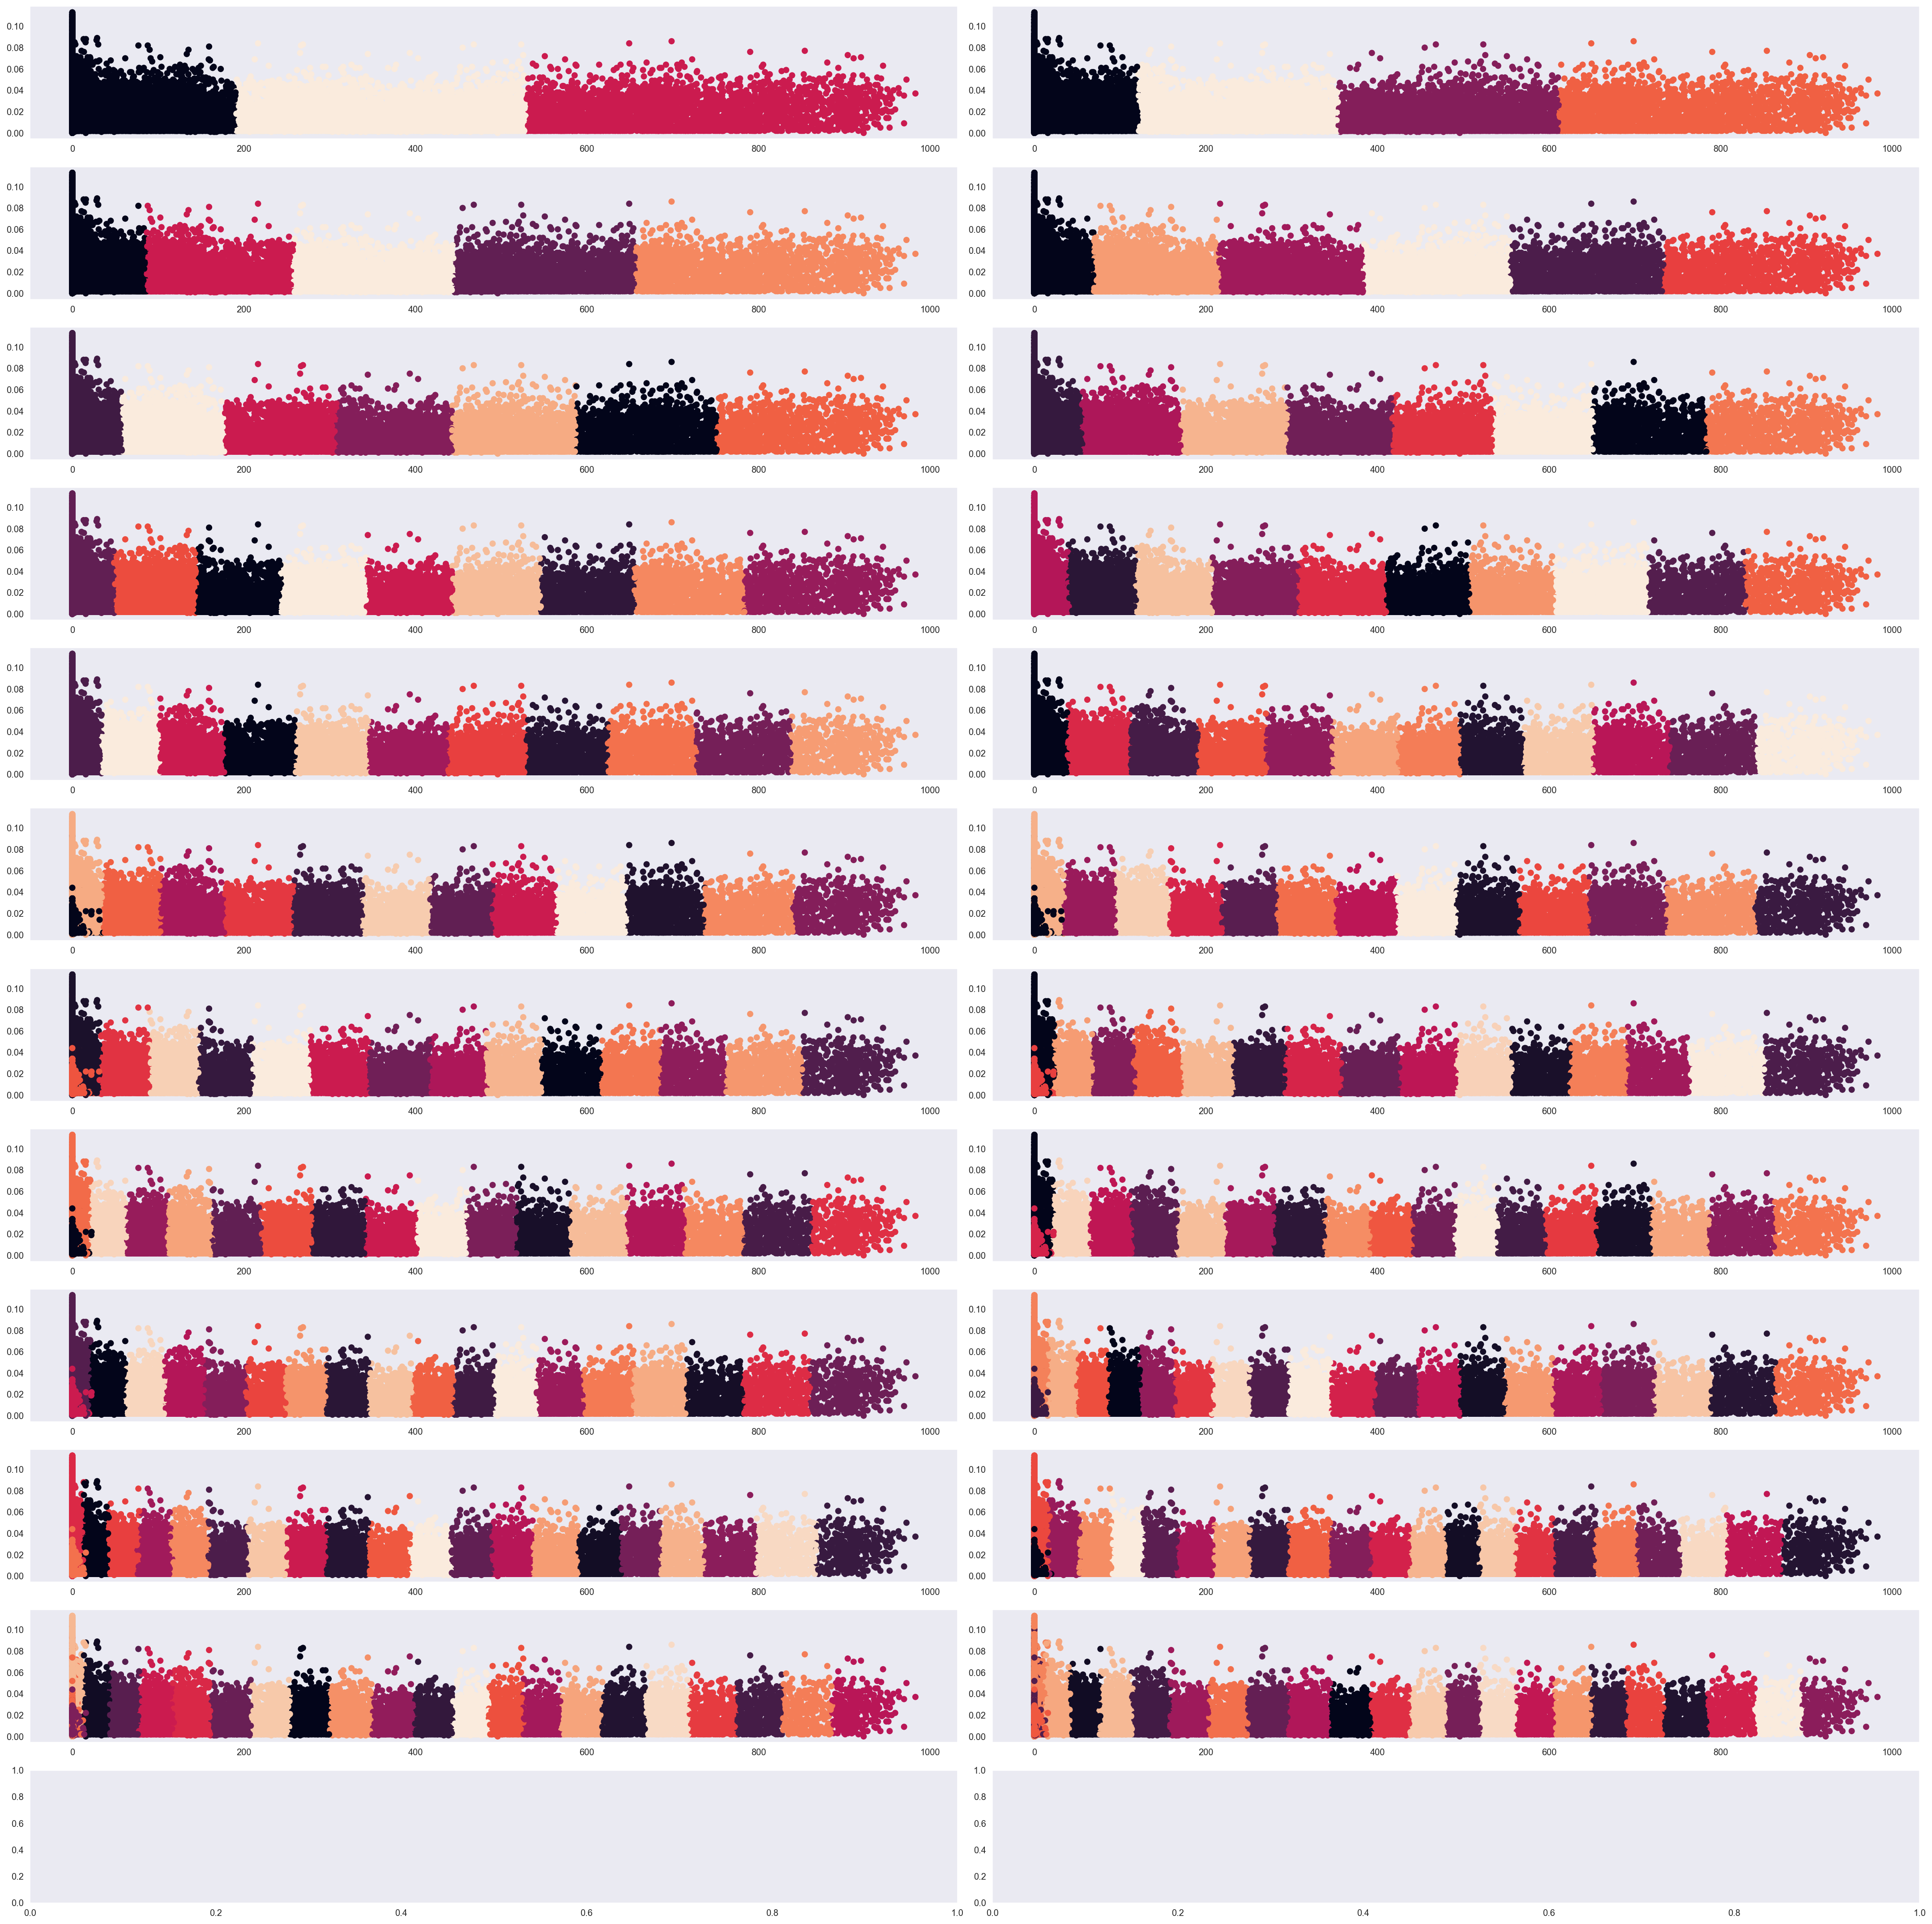

time: 1min 10s


In [191]:
from sklearn.cluster import KMeans

# .inertia_ returns the sum of squared distances of samples to their closest cluster center
# .cluster_centers_  returns array wuth coordinates of cluster centers
# .labels_ returns the cluster label of each example in order

cluster_magn = pd.DataFrame(index=range(3, 25), columns=["Magnitude"])

fig, axs = plt.subplots(12,2, figsize = (30, 30))
fig.tight_layout()


for k in range(3, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[["O3", "Radiation", "Temperature (K)", "NO2"]])
    clusters = kmeans.labels_
    cluster_magn["Magnitude"][k] = kmeans.inertia_
    print("\nk = ", k, "\nCluster Magnitude = ", kmeans.inertia_)
    axs[(k-3)//2][(k-3)%2].scatter(x=df["Radiation"], y=df["O3"], c=clusters)
    
plt.show()

Text(0.5, 1.0, 'Cluster Magnitudes for Number of Clusters')

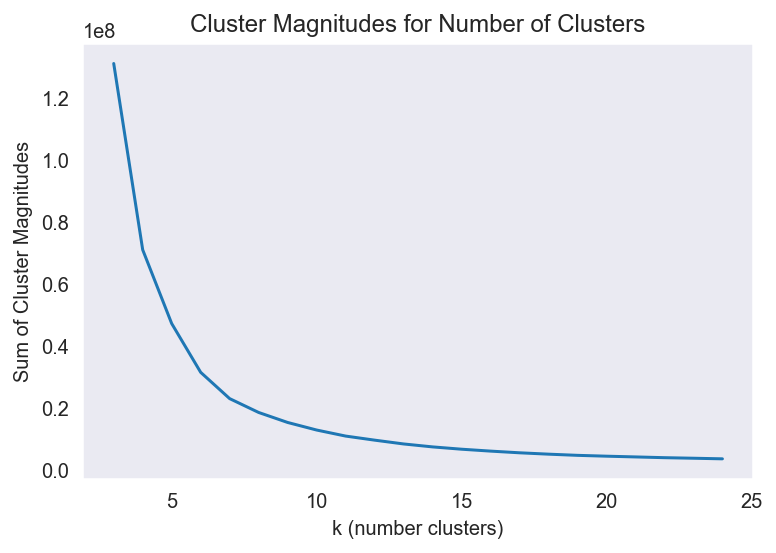

time: 400 ms


In [193]:
plt.plot(cluster_magn)
plt.xlabel("k (number clusters)")
plt.ylabel("Sum of Cluster Magnitudes")
plt.title("Cluster Magnitudes for Number of Clusters")

The scatterplots shows that O3 data can very clearly be clustered on the basis of radiation. I chose to cluster on radiation, temperature, and NO2 because those were the non-O3 variables that had the highest cross-correlation with O3 concentration. For the other air pollutants, clustering should be done off of different variables. This could be an argument for including pollutant-specific clusters in the data for our machine learning models as somewhat of a "derived" statistic that merges the meaning of multiple key variables into one value. 